# Solar Power Generation Forecasting
## session of 2024
#### Produced and Presented by:**El Otmani Najat**

### This project is supervised by Professor ***Chafik Okar***


**1. Why I Have Chosen This Area for My Research**:
I decided to focus my research on solar power generation because it combines my interest in renewable energy with my desire to apply data science to real-world problems. With climate change being a pressing global issue, solar energy has become a crucial alternative to fossil fuels. By analyzing this dataset, which tracks solar power production over time along with factors like weather and system performance, I can explore how data-driven insights can optimize energy efficiency.

This project excites me because it allows me to work with real-world data while developing key skills in data cleaning, visualization, and predictive modeling. I want to understand how different variables—such as sunlight exposure, temperature, and panel maintenance—affect energy output. Additionally, improving solar power forecasts could help energy providers manage supply more effectively, making this research both academically and practically valuable.

**2. Project Description:**
This project provides a real-world data Solar Power Generation ,This dataset contains time-series data related to energy production from a solar power plant. It includes key metrics that track the performance of solar panels over time, helping to analyze and forecast energy generation trends.

Solar power generation depends on multiple factors, including weather conditions, panel efficiency, and system health. Predicting energy yield can help optimize energy planning, detect inefficiencies, and improve sustainability efforts.


## Dataset Overview 

The dataset includes the following columns:

* DATE_TIME: The timestamp of the recorded data (in YYYY-MM-DD HH:MM format).
* PLANT_ID: Identifier for the solar power plant.
* SOURCE_KEY: Unique identifier for each inverter (solar panel unit).
* DC_POWER: Direct Current (DC) power output from the inverter (measured in kW).
* AC_POWER: Alternating Current (AC) power output after conversion (measured in kW).
* DAILY_YIELD: The energy generated by the inverter for the current day (measured in kWh). Resets to zero at midnight **(The energy after midnight is 0 because solar panels don't generate electricity during the night — they need sunlight to produce energy)**.
* TOTAL_YIELD: The cumulative energy generated by the inverter since installation (measured in kWh).


In [4]:
import pandas as pd

# Chemin du fichier
file_path = "Plant_1_Generation_Data.csv"

# Lire le fichier CSV
df = pd.read_csv(file_path)

# Identifier la colonne de date
date_column = df.columns[0]  

# Spécifier le format exact de la date (jour/mois/année à 2 chiffres)
df[date_column] = pd.to_datetime(df[date_column], format="%d-%m-%Y %H:%M", errors='coerce')
df


DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
68773 2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774 2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775 2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776 2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777 2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

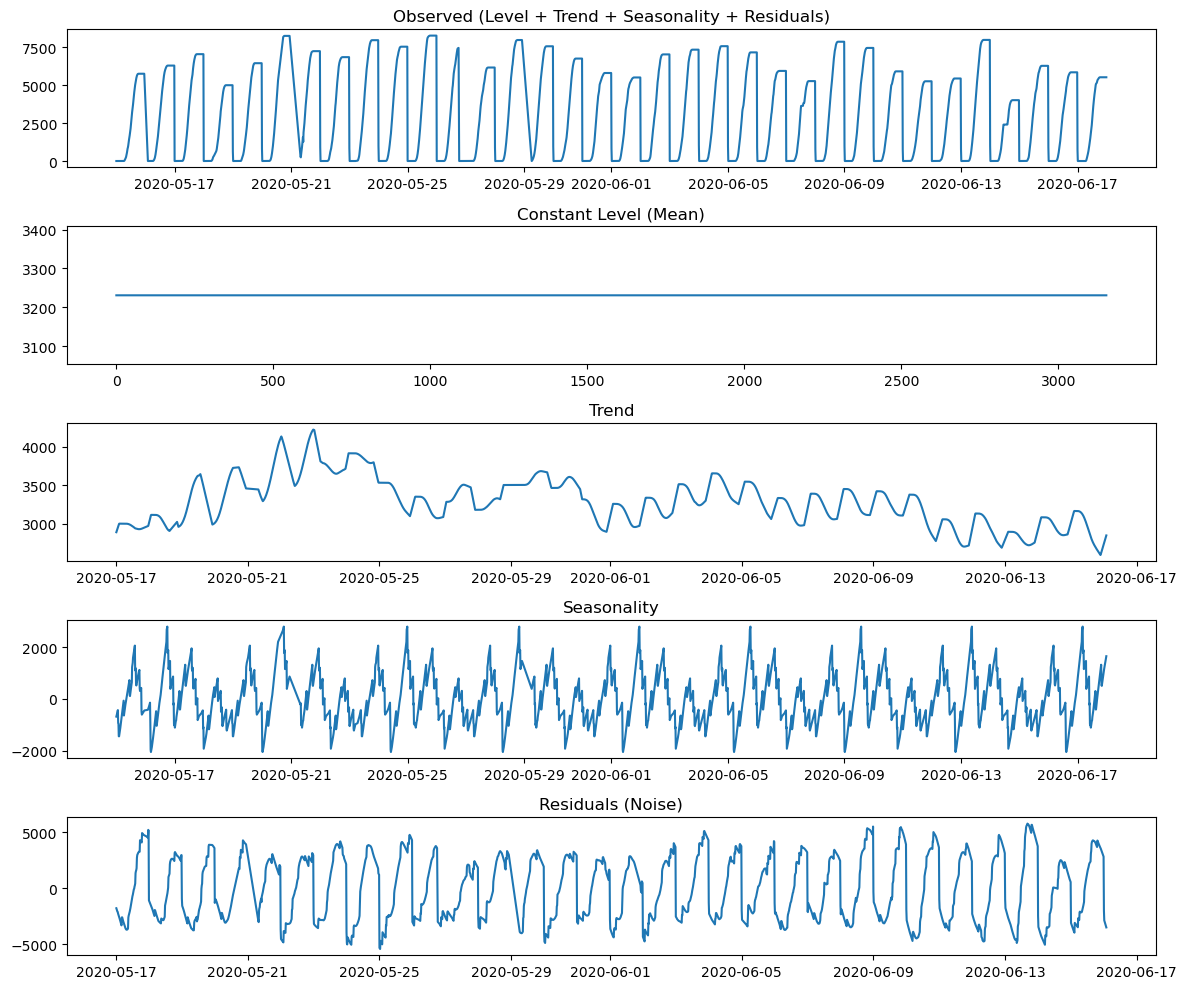

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
df = pd.read_csv("Plant_1_Generation_Data.csv")

# Parse datetime correctly (day comes first)
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce', dayfirst=True)
df.set_index('DATE_TIME', inplace=True)

# Select one inverter/source to analyze
source_id = df['SOURCE_KEY'].unique()[0]
df_source = df[df['SOURCE_KEY'] == source_id].copy()

# Convert DAILY_YIELD to numeric and interpolate missing values
df_source['DAILY_YIELD'] = pd.to_numeric(df_source['DAILY_YIELD'], errors='coerce')
df_source['DAILY_YIELD'] = df_source['DAILY_YIELD'].interpolate(method='linear')

# Decompose the time series (using daily period = 1 for daily seasonality)
decomposition = seasonal_decompose(df_source['DAILY_YIELD'].dropna(), 
                                   model='additive', period=365)

# Create a constant level component
composante_niveau = np.full_like(decomposition.observed, decomposition.observed.mean())

# Plot the decomposition
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed (Level + Trend + Seasonality + Residuals)')

plt.subplot(5, 1, 2)
plt.plot(composante_niveau)
plt.title('Constant Level (Mean)')

plt.subplot(5, 1, 3)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(5, 1, 4)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(5, 1, 5)
plt.plot(decomposition.resid)
plt.title('Residuals (Noise)')

plt.tight_layout()
plt.show()


## Is this dataset a Random Walk?

In [7]:

import pandas as pd
from pandas import read_csv, DataFrame
from matplotlib import pyplot

# Load the CSV file with date parsing
series = read_csv(
    'Plant_1_Generation_Data.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    date_format="%d-%m-%Y %H:%M"  # Adjust according to your file's format
)

# Convert numeric columns to numeric types
# Exclude the SOURCE_KEY column (assuming it's the third column, index 2)
numeric_columns = series.columns.drop('SOURCE_KEY')  # Drop the non-numeric column
energy= series[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Set the index to the original datetime index
energy.index = series.index

# Display the DataFrame
energy

PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DATE_TIME                                                                  
2020-05-15 00:00:00   4135001       0.0       0.0        0.000    6259559.0
2020-05-15 00:00:00   4135001       0.0       0.0        0.000    6183645.0
2020-05-15 00:00:00   4135001       0.0       0.0        0.000    6987759.0
2020-05-15 00:00:00   4135001       0.0       0.0        0.000    7602960.0
2020-05-15 00:00:00   4135001       0.0       0.0        0.000    7158964.0
...                       ...       ...       ...          ...          ...
2020-06-17 23:45:00   4135001       0.0       0.0     5967.000    7287002.0
2020-06-17 23:45:00   4135001       0.0       0.0     5147.625    7028601.0
2020-06-17 23:45:00   4135001       0.0       0.0     5819.000    7251204.0
2020-06-17 23:45:00   4135001       0.0       0.0     5817.000    6583369.0
2020-06-17 23:45:00   4135001       0.0       0.0     5910.000    7363272.0

[68778 rows x 5 columns]

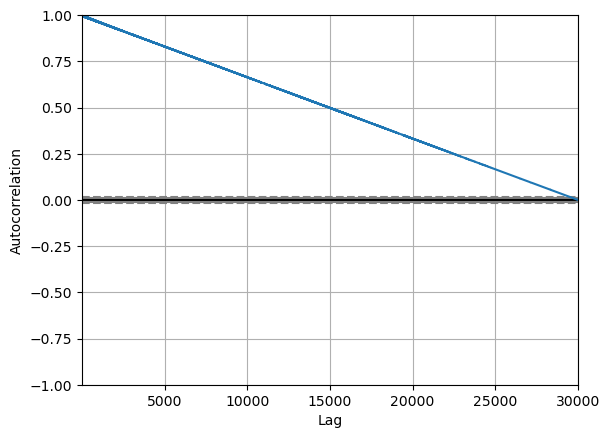

In [8]:
# Use only the first 30000 rows for plotting
energy_sampled = energy[:30000]

from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(energy_sampled)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
column_to_analyze = df['DAILY_YIELD']  # Extract the column as a 1D array

# Perform the ADF test
result = adfuller(column_to_analyze)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -7.087451
p-value: 0.000000
Critical Values:
	1%: -3.430445169094101
	5%: -2.861582063037551
	10%: -2.56679238871977


The results we provided are from an Augmented Dickey-Fuller (ADF) test, which is used to test for stationarity in a time series:Since the ADF statistic is smaller than the critical values and the p-value is equal to Zero , we reject the null hypothesis. This means the time series is  stationary.

## Feature engineering
### Lag Features

In [12]:
from pandas import concat

dataframe = concat([df['DAILY_YIELD'].shift(1), df['DAILY_YIELD']], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

              t  t+1
DATE_TIME           
2020-05-15  NaN  0.0
2020-05-15  0.0  0.0
2020-05-15  0.0  0.0
2020-05-15  0.0  0.0
2020-05-15  0.0  0.0


In [13]:
dataframe2 = concat([df['DAILY_YIELD'].shift(3),df['DAILY_YIELD'].shift(2),df['DAILY_YIELD'].shift(1), df['DAILY_YIELD']], axis=1)
dataframe2.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe2.head(5))

            t-2  t-1    t  t+1
DATE_TIME                     
2020-05-15  NaN  NaN  NaN  0.0
2020-05-15  NaN  NaN  0.0  0.0
2020-05-15  NaN  0.0  0.0  0.0
2020-05-15  0.0  0.0  0.0  0.0
2020-05-15  0.0  0.0  0.0  0.0


# Data Visualization
Moving forward in our analys I used histograms to quickly gain an understanding of the distribution of each attribute. Histograms group data into bins and show the frequency of observations within each bin. I chose to use different types of histograms for better visualization and a clearer understanding of my time series.
## Line plot

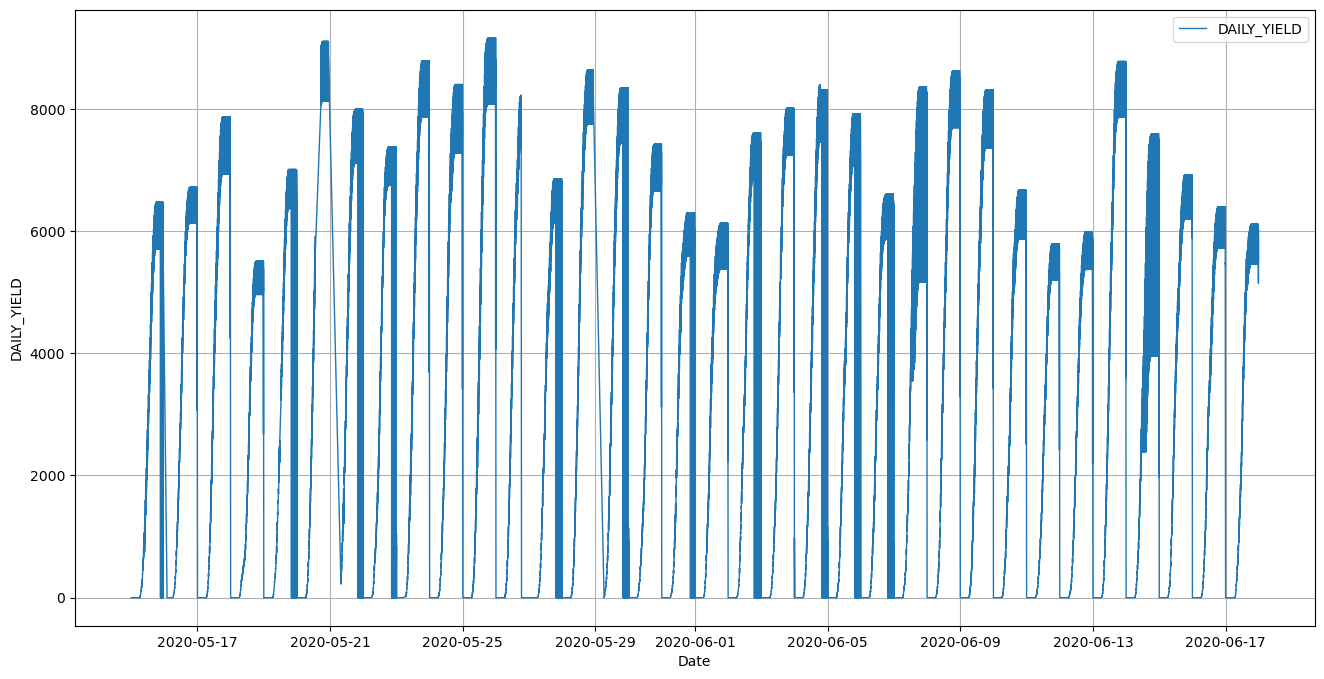

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
series = pd.read_csv(
    'Plant_1_Generation_Data.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    dayfirst=True  # Ensures the date format is correctly interpreted
)

# Convert numeric columns to proper format
df = series.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(16, 8))  # Set figure size
plt.plot(df.index, df['DAILY_YIELD'], label='DAILY_YIELD', linewidth=1)
plt.xlabel("Date")
plt.ylabel('DAILY_YIELD')
plt.legend()
plt.grid()
plt.show()



since The line plot is quite dense. we can change the style of the line to be black dots instead of a connected line (the style=’k.’ argument). We could change this example to use a dashed line by setting style to be ’k--’.

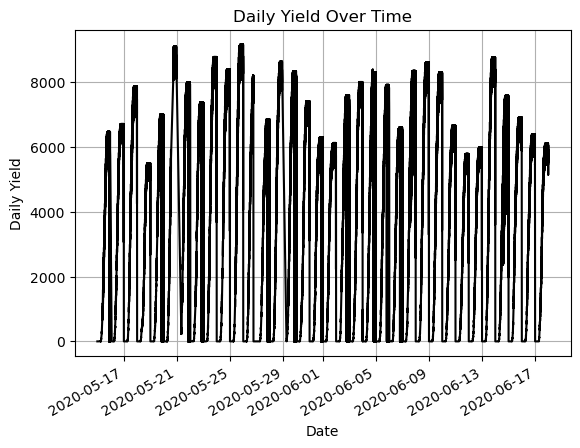

In [17]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the CSV file with date parsing
series = pd.read_csv(
    'Plant_1_Generation_Data.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    dayfirst=True  # Ensures the date format is correctly interpreted
)

# Ensure the 'DAILY_YIELD' column is numeric
series['DAILY_YIELD'] = pd.to_numeric(series['DAILY_YIELD'], errors='coerce')

# Plot the 'DAILY_YIELD' column alone
series['DAILY_YIELD'].plot(style='k-', title='Daily Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Yield')
plt.grid(True)
plt.show()

## Histogram and Density Plots

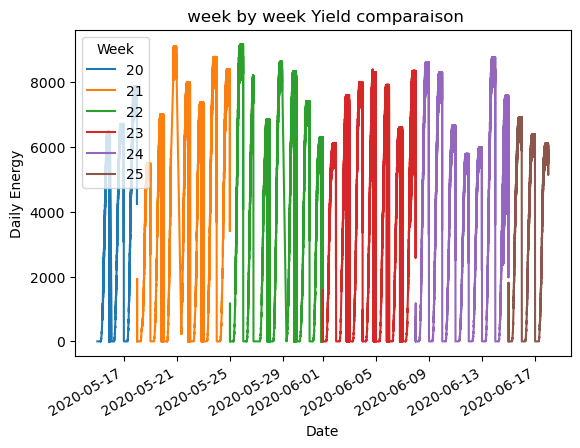

In [19]:
import pandas as pd
from pandas import Grouper
from matplotlib import pyplot


groups = series.groupby(Grouper(freq='W'))

for name, group in groups:
    # Ensure the data is numeric and plot each year
    group = group.apply(pd.to_numeric, errors='coerce')
    group['DAILY_YIELD'].plot(label=name.week)  # Label each line with the corresponding year

# Add labels and legend
pyplot.title(" week by week Yield comparaison")
pyplot.xlabel("Date")
pyplot.ylabel("Daily Energy")
pyplot.legend(title="Week", loc="upper left")

# Show the plot
pyplot.show()




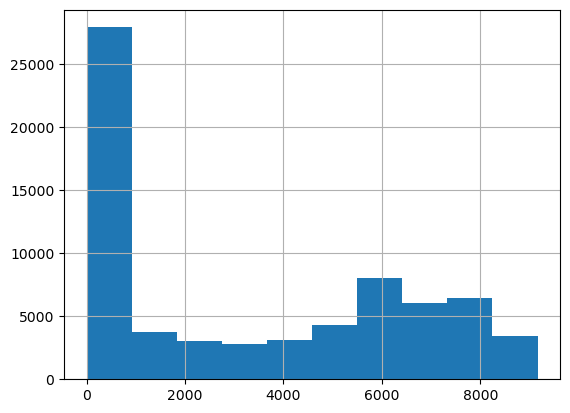

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot the histogram
series['DAILY_YIELD'].hist()
plt.show()

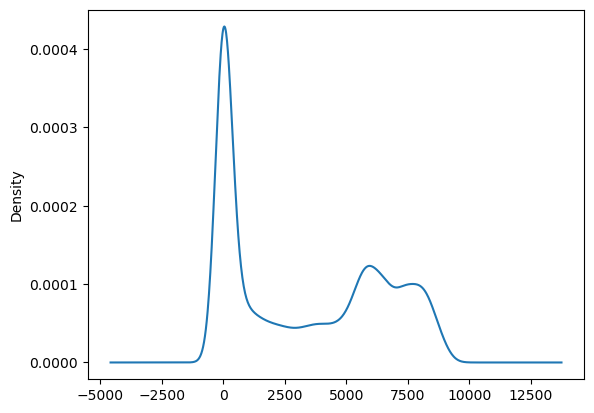

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the histogram
series['DAILY_YIELD'].plot(kind='kde')
pyplot.show()

From this KDE plot, we can conclude that:

The DAILY_YIELD data is heavily concentrated around zero, indicating that most days have yields close to zero.
and there is a positive skew, with a long tail extending to the right, suggesting occasional higher yields.

## Box and Whisker Plots by Interval

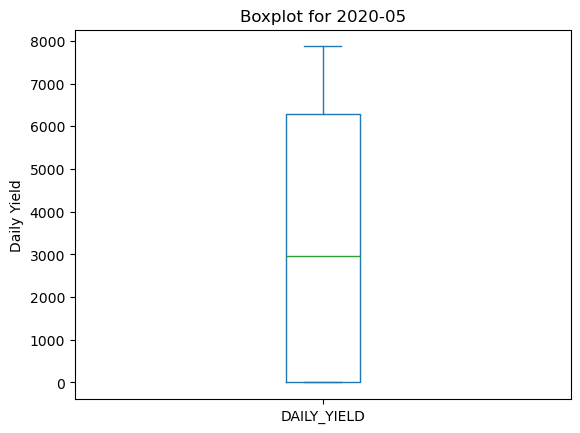

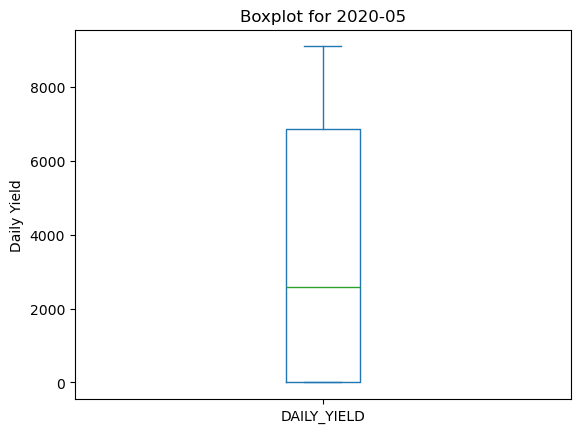

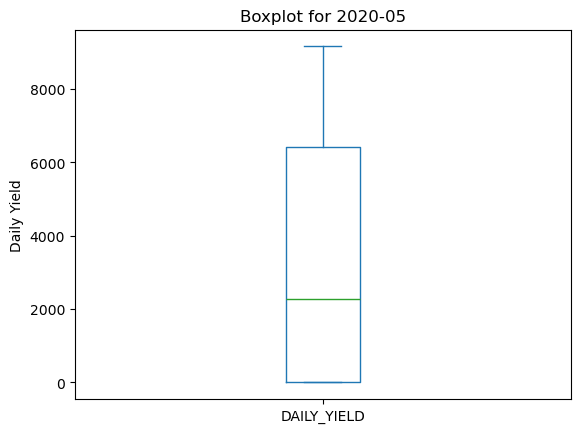

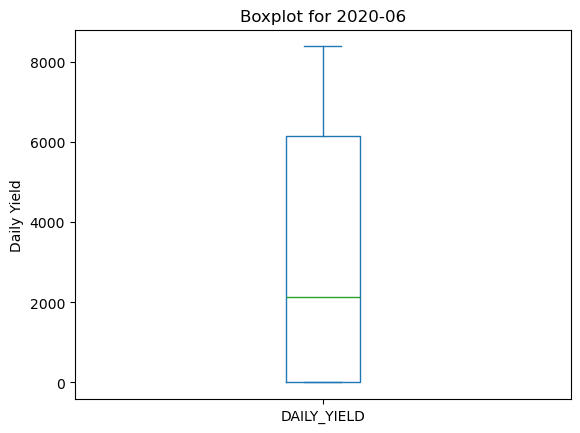

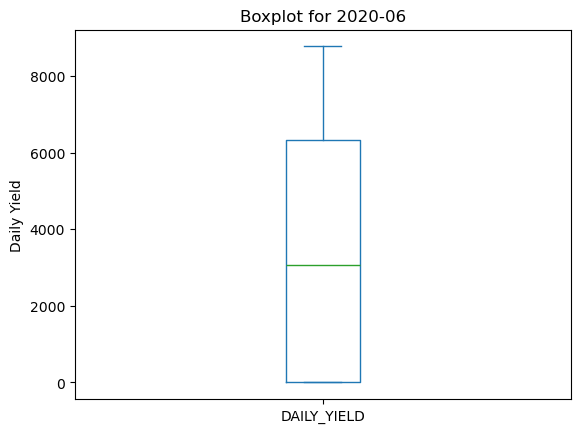

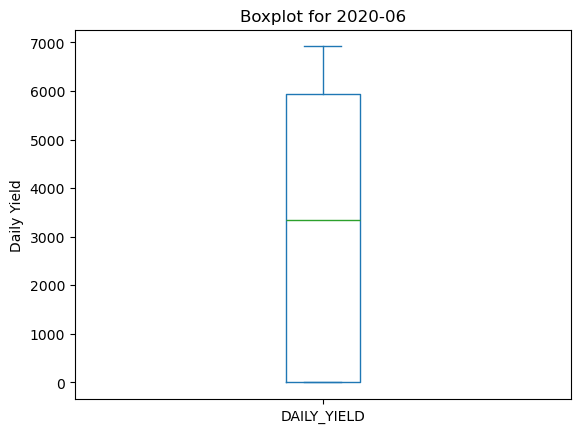

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by a specific frequency (e.g., monthly)
groups = series.groupby(pd.Grouper(freq='W'))  # 'ME' for month-end frequency

# Plot boxplots for the 'DAILY_YIELD' column in each group
for name, group in groups:
    # Create a boxplot for the 'DAILY_YIELD' column
    plt.figure()  # Create a new figure for each group
    group['DAILY_YIELD'].plot(kind='box')  # Plot boxplot for the column
    plt.title(f'Boxplot for {name.strftime("%Y-%m")}')  # Add a title with the corresponding month
    plt.ylabel('Daily Yield')  # Label the y-axis
    plt.show()  # Show the plot for each group

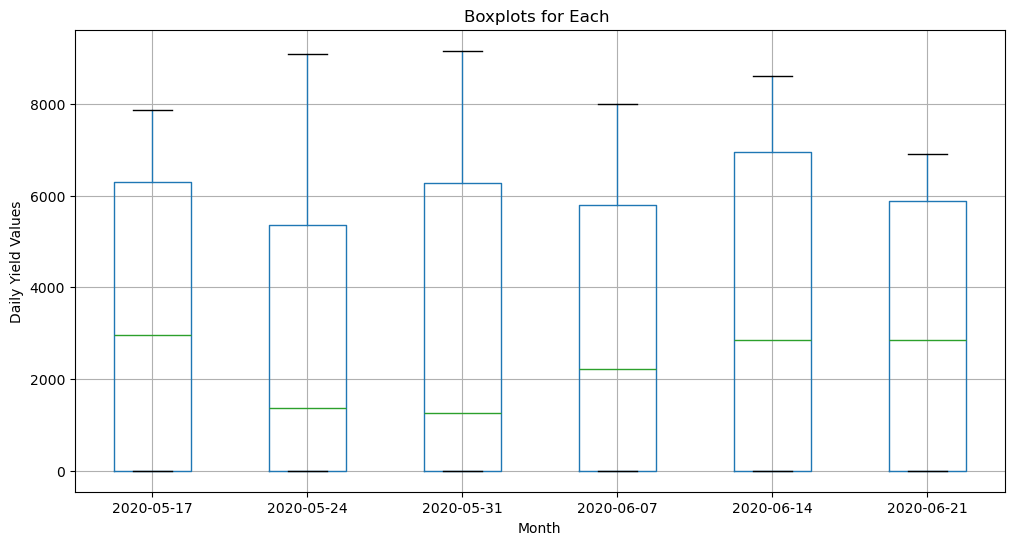

In [25]:
import pandas as pd
from pandas import DataFrame, Grouper
import matplotlib.pyplot as plt

# Read the CSV file
series = pd.read_csv(
    'Plant_1_Generation_Data.csv',  # Replace with your file name
    header=0,
    index_col=0,
    parse_dates=True,
    dayfirst=True  # Ensures the date format is correctly interpreted
)

# Ensure the 'DAILY_YIELD' column is numeric
series['DAILY_YIELD'] = pd.to_numeric(series['DAILY_YIELD'], errors='coerce')

# Group by month (since your data spans 3 months)
groups = series.groupby(Grouper(freq='W'))  # 'ME' for month-end frequency

# Create an empty DataFrame to store monthly data
months = DataFrame()

# Populate the DataFrame with monthly data
for name, group in groups:
    # Reset the index to align data properly
    group = group.reset_index(drop=True)
    months[name.strftime('%Y-%m-%d')] = group['DAILY_YIELD']

# Generate boxplots for all months
months.boxplot(figsize=(12, 6))

# Add labels and title
plt.title('Boxplots for Each ')
plt.xlabel('Month')
plt.ylabel('Daily Yield Values')

# Show the plot
plt.show()

The box plot indicates that daily yield values are concentrated around a median below 3000, with variability differing across dates. 

## Heat Maps

<Figure size 1200x600 with 0 Axes>

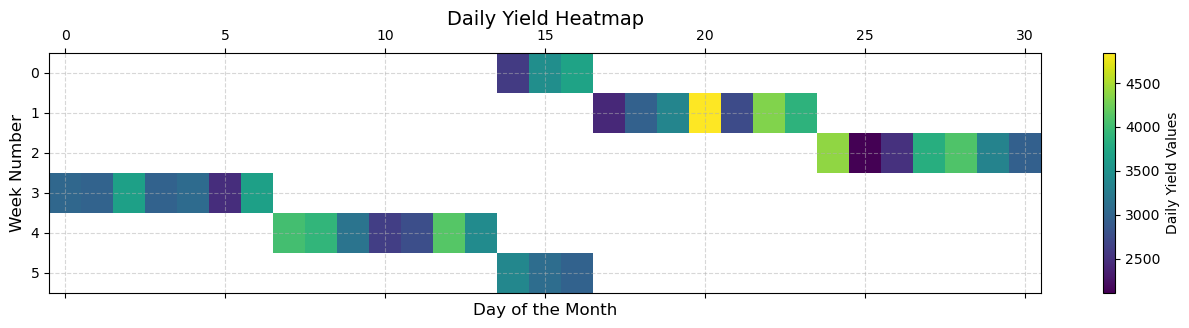

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
series = pd.read_csv(
    'Plant_1_Generation_Data.csv',  # Replace with your file name
    header=0,
    index_col=0,
    parse_dates=True,
    dayfirst=True  # Ensures the date format is correctly interpreted
)

# Ensure the 'DAILY_YIELD' column is numeric
series['DAILY_YIELD'] = pd.to_numeric(series['DAILY_YIELD'], errors='coerce')

# Reshape the data for the heatmap
# Create a pivot table with days as columns and weeks/months as rows
series['Week'] = series.index.isocalendar().week  # Extract week number
series['Day'] = series.index.day  # Extract day of the month

# Pivot the data to create a 2D matrix for the heatmap
heatmap_data = series.pivot_table(
    index='Week',  # Rows represent weeks
    columns='Day',  # Columns represent days
    values='DAILY_YIELD',  # Values represent daily yield
    aggfunc='mean'  # Aggregate by mean (or use 'sum', 'max', etc.)
)
# Adjust figure size for better readability
plt.figure(figsize=(12, 6))

# Create the heatmap
plt.matshow(heatmap_data, interpolation=None, aspect='auto', cmap='viridis')

# Add a colorbar as a legend
cbar = plt.colorbar()
cbar.set_label('Daily Yield Values')  # Add a label to the colorbar

# Add labels and title
plt.xlabel('Day of the Month', fontsize=12)  # Label for the x-axis
plt.ylabel('Week Number', fontsize=12)  # Label for the y-axis
plt.title('Daily Yield Heatmap', fontsize=14, pad=20)  # Add a title

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


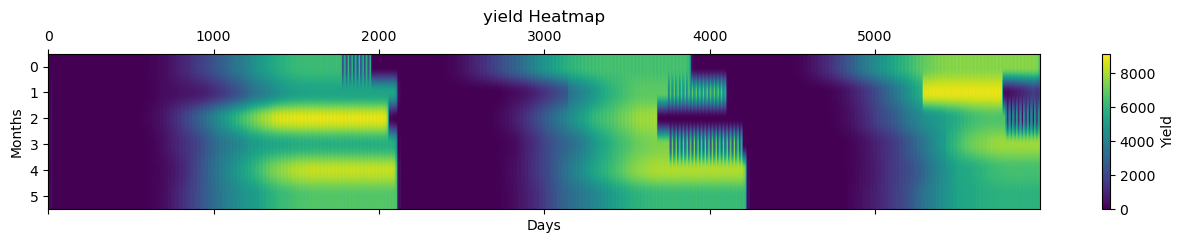

In [29]:
import matplotlib.pyplot as plt

months=months.T
# Create the heatmap
plt.matshow(months, interpolation=None, aspect='auto')

# Add a colorbar as a legend
cbar = plt.colorbar()
cbar.set_label('Yield')  # Add a label to the colorbar

# Add labels and title
plt.xlabel('Days')  # Label for the x-axis
plt.ylabel('Months')    # Label for the y-axis
plt.title('yield Heatmap')  # Add a title

# Show the plot
plt.show()

The heatmap shows how the daily yield changes over the course of a month. It highlights which days had high or low yields. From the heatmap, we can see that the yield doesn't follow a clear pattern (like steadily increasing or decreasing), but instead, it varies a lot from one day to the next and even across different weeks. This means there’s no consistent trend, but there are periods where the yield is higher or lower than usual.


## Lag Scatter Plots

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

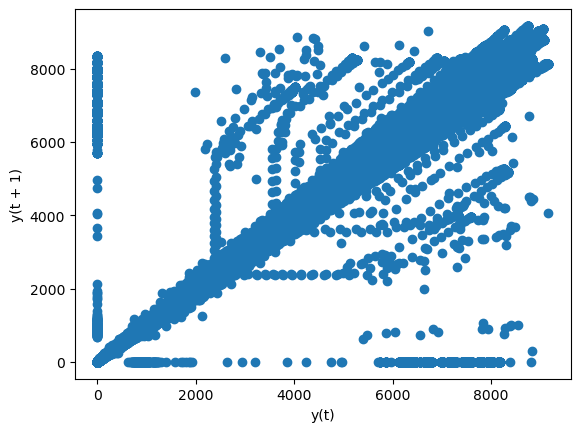

In [32]:
from pandas.plotting import lag_plot

series['DAILY_YIELD'] = pd.to_numeric(energy['DAILY_YIELD'], errors='coerce')

# Create a lag plot for the 'DAILY_YIELD' column
lag_plot(series['DAILY_YIELD'])


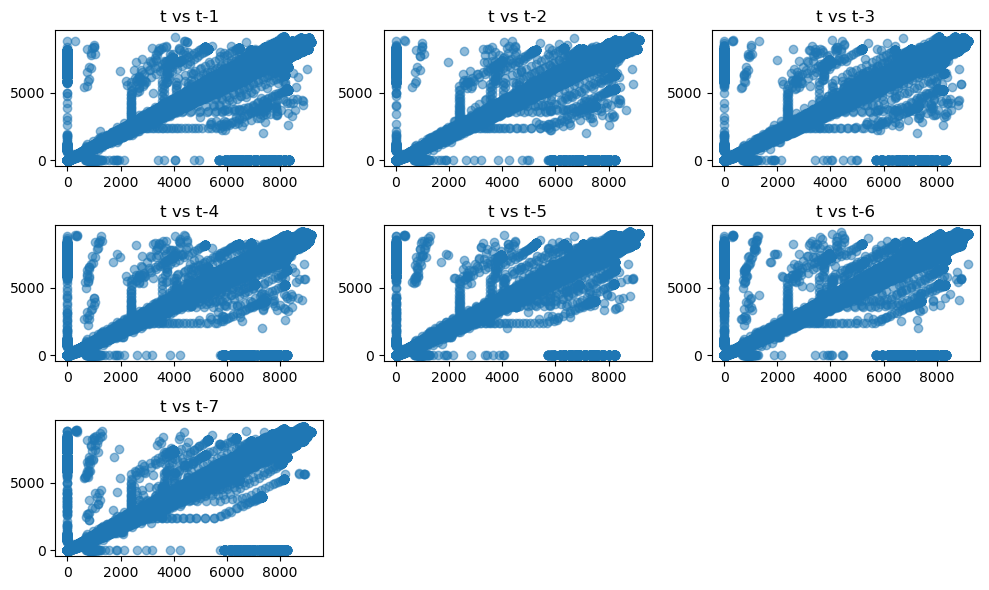

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = "Plant_1_Generation_Data.csv"

# Load the CSV file with proper date parsing
df = pd.read_csv(
    file_path,
    parse_dates=['DATE_TIME'],  # Convert DATE_TIME to datetime format
    index_col='DATE_TIME',      # Set DATE_TIME as the index
    dayfirst=True               # Ensure day-first format (DD-MM-YYYY)
)

# Convert all numeric columns to float (handle NaNs if any)
df = df.apply(pd.to_numeric, errors='coerce')

# Select a column for analysis (e.g., DAILY_YIELD)
values = df[['DAILY_YIELD']].copy()  # Ensure it's a DataFrame

# Create lagged dataset for visualization
lags = 7  # Number of lagged values
columns = [values]

# Shift data to create lagged versions
for i in range(1, lags + 1):
    columns.append(values.shift(i))

dataframe = pd.concat(columns, axis=1)

# Rename columns
column_names = ['t'] + [f't-{i}' for i in range(1, lags + 1)]
dataframe.columns = column_names

# Plot scatter plots for each lag
plt.figure(figsize=(10, 6))
for i in range(1, lags + 1):
    ax = plt.subplot(3, 3, i)  # Adjust subplot grid size if needed
    ax.set_title(f't vs t-{i}')
    plt.scatter(x=dataframe['t'], y=dataframe[f't-{i}'], alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


The lag plot reveals that the DAILY_YIELD data exhibits autocorrelation, with a tendency for consecutive days to have similar yields. However, there is also variability, indicating that the process is not entirely deterministic.

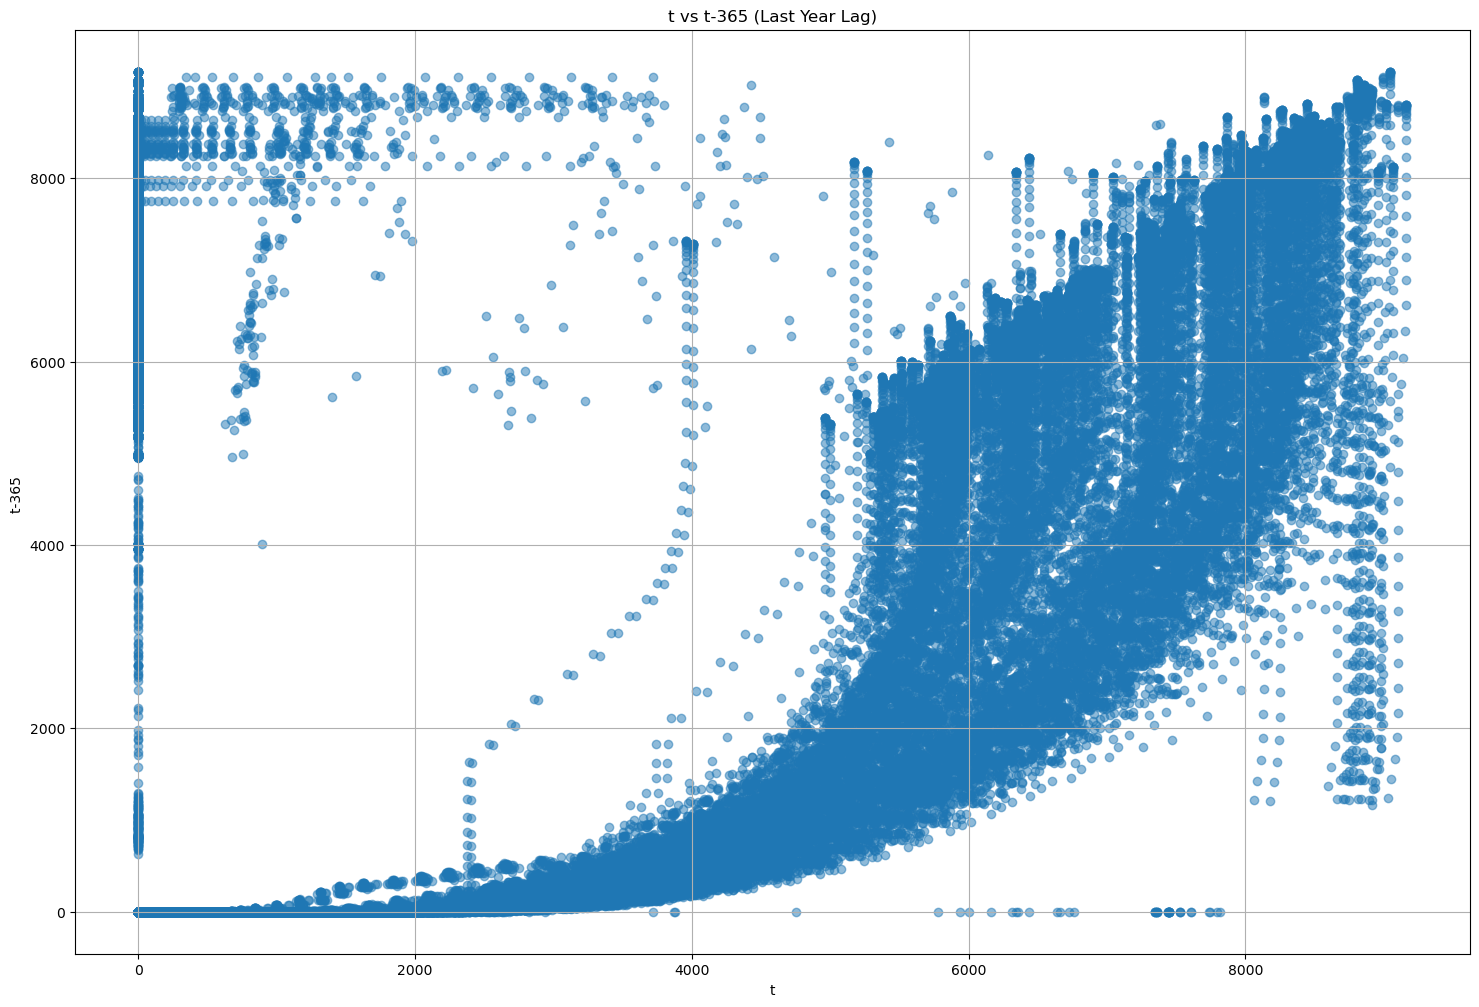

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Plant_1_Generation_Data.csv"

# Load the CSV file with proper date parsing
df = pd.read_csv(
    file_path,
    parse_dates=['DATE_TIME'],  # Convert DATE_TIME to datetime format
    index_col='DATE_TIME',      # Set DATE_TIME as the index
    dayfirst=True               # Ensure day-first format (DD-MM-YYYY)
)
# Convert all numeric columns to float (handle NaNs if any)
df = df.apply(pd.to_numeric, errors='coerce')

# Select a column for analysis (e.g., DAILY_YIELD)
values = df[['DAILY_YIELD']].copy()  # Ensure it's a DataFrame

# Define the lag for the last year (e.g., 365 for daily data)
last_year_lag = 365

# Create a lagged version of the data
values_lagged = values.shift(last_year_lag)

# Combine the original and lagged data into a single DataFrame
dataframe = pd.concat([values, values_lagged], axis=1)
dataframe.columns = ['t', 't-' + str(last_year_lag)]

# Drop rows with NaN values (created by the shift operation)
dataframe.dropna(inplace=True)

# Create the scatter plot
plt.figure(figsize=(18, 12))
plt.scatter(x=dataframe['t'], y=dataframe['t-' + str(last_year_lag)], alpha=0.5)
plt.title(f't vs t-{last_year_lag} (Last Year Lag)')
plt.xlabel('t')
plt.ylabel(f't-{last_year_lag} ')
plt.grid(True)
plt.show()

## Autocorrelation Plots

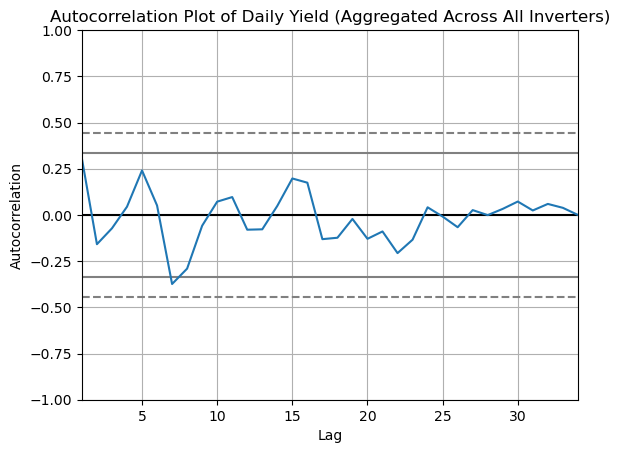

In [37]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
from matplotlib import pyplot

# Load the CSV file
df = pd.read_csv('Plant_1_Generation_Data.csv')

# Convert DATE_TIME to datetime format
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Aggregate DAILY_YIELD across all SOURCE_KEYs for each day
# Use the maximum DAILY_YIELD for each day (since it represents cumulative yield)
daily_yield = df.groupby(df['DATE_TIME'].dt.date)['DAILY_YIELD'].max()

# Convert the index to datetime for proper time-series analysis
daily_yield.index = pd.to_datetime(daily_yield.index)

# Drop rows with NaN values (if any)
daily_yield.dropna(inplace=True)

# Plot the autocorrelation
autocorrelation_plot(daily_yield)
pyplot.title('Autocorrelation Plot of Daily Yield (Aggregated Across All Inverters)')
pyplot.show()

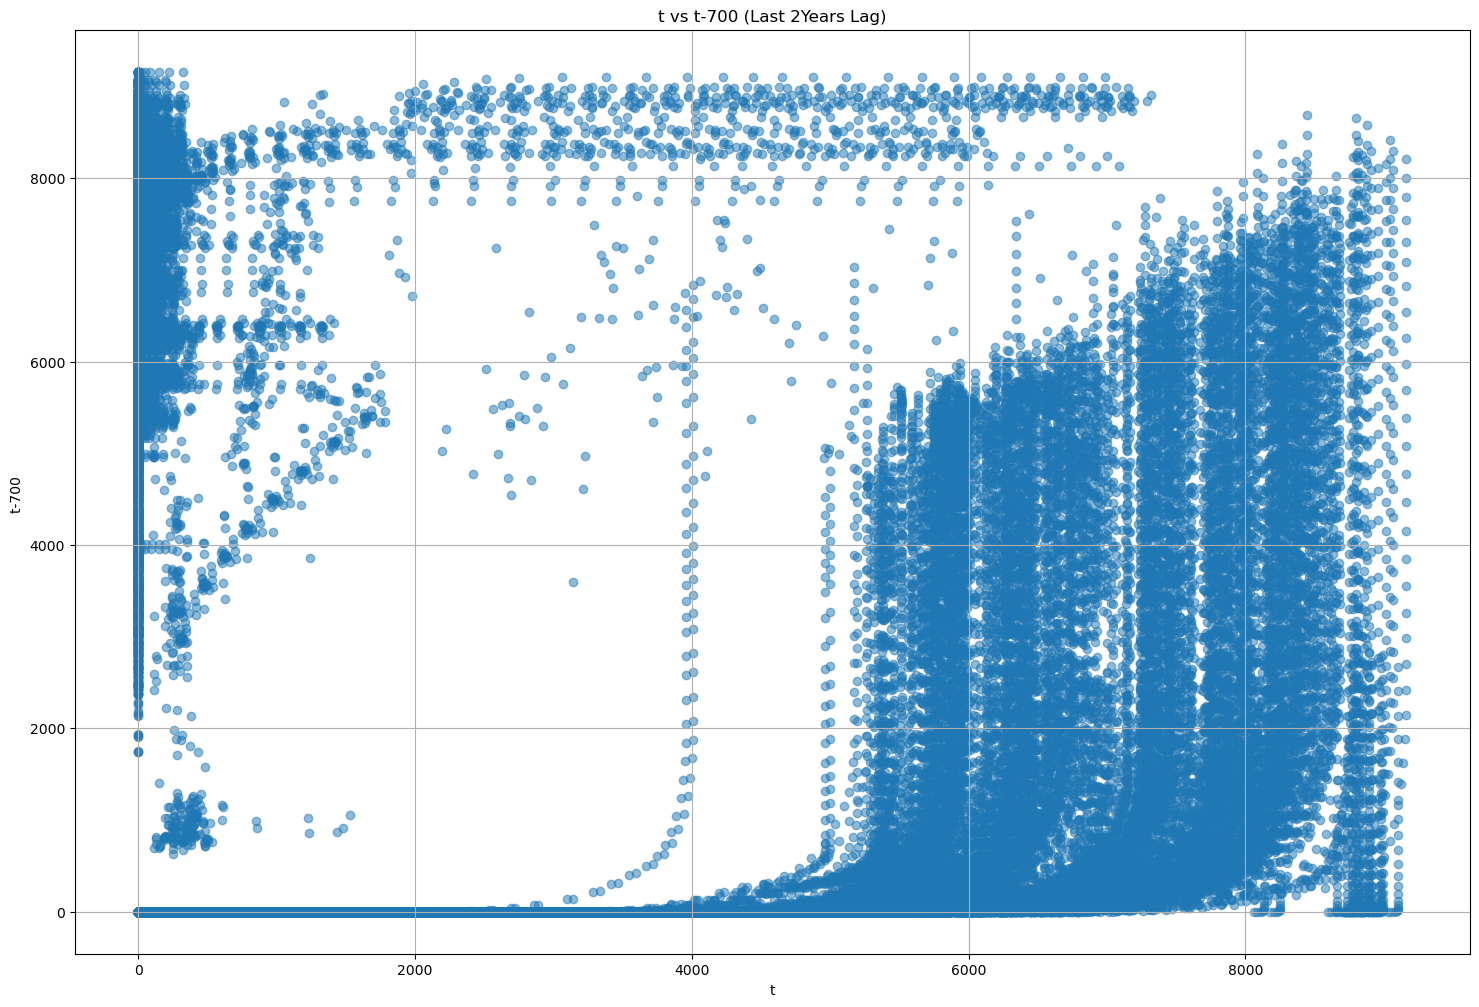

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Plant_1_Generation_Data.csv"

# Load the CSV file with proper date parsing
df = pd.read_csv(
    file_path,
    parse_dates=['DATE_TIME'],  # Convert DATE_TIME to datetime format
    index_col='DATE_TIME',      # Set DATE_TIME as the index
    dayfirst=True               # Ensure day-first format (DD-MM-YYYY)
)
# Convert all numeric columns to float (handle NaNs if any)
df = df.apply(pd.to_numeric, errors='coerce')

# Select a column for analysis (e.g., DAILY_YIELD)
values = df[['DAILY_YIELD']].copy()  # Ensure it's a DataFrame

# Define the lag for 
last_year_lag = 700

# Create a lagged version of the data
values_lagged = values.shift(last_year_lag)

# Combine the original and lagged data into a single DataFrame
dataframe = pd.concat([values, values_lagged], axis=1)
dataframe.columns = ['t', 't-' + str(last_year_lag)]

# Drop rows with NaN values (created by the shift operation)
dataframe.dropna(inplace=True)

# Create the scatter plot
plt.figure(figsize=(18, 12))
plt.scatter(x=dataframe['t'], y=dataframe['t-' + str(last_year_lag)], alpha=0.5)
plt.title(f't vs t-{last_year_lag} (Last 2Years Lag)')
plt.xlabel('t')
plt.ylabel(f't-{last_year_lag} ')
plt.grid(True)
plt.show()

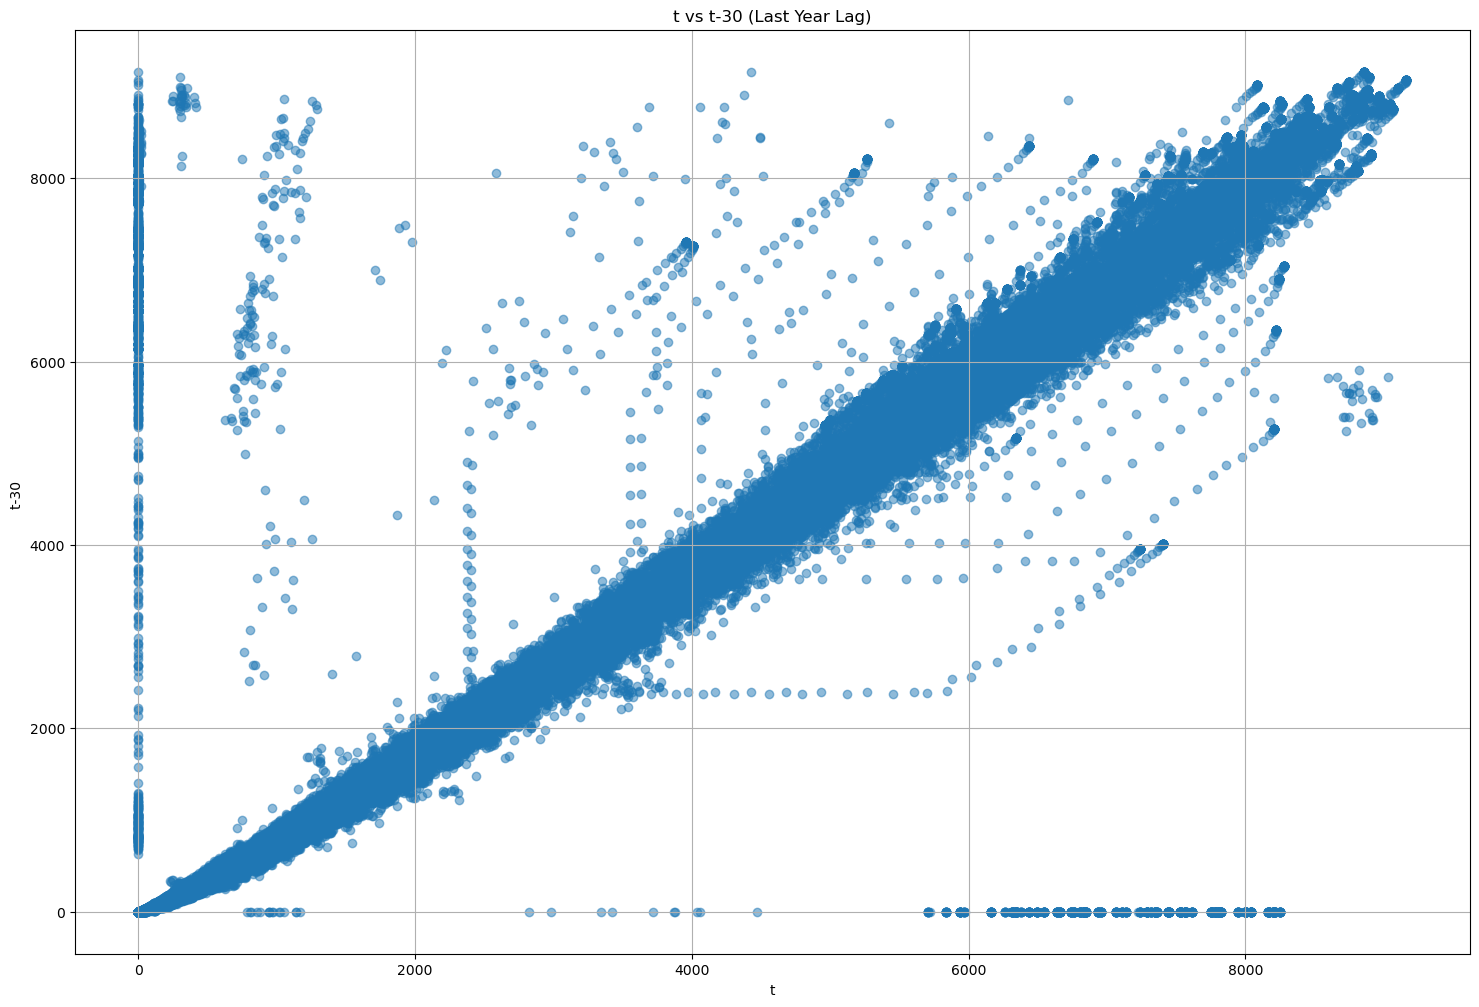

In [39]:

import pandas as pd
import matplotlib.pyplot as plt

file_path = "Plant_1_Generation_Data.csv"

# Load the CSV file with proper date parsing
df = pd.read_csv(
    file_path,
    parse_dates=['DATE_TIME'],  # Convert DATE_TIME to datetime format
    index_col='DATE_TIME',      # Set DATE_TIME as the index
    dayfirst=True               # Ensure day-first format (DD-MM-YYYY)
)
# Convert all numeric columns to float (handle NaNs if any)
df = df.apply(pd.to_numeric, errors='coerce')

# Select a column for analysis (e.g., DAILY_YIELD)
values = df[['DAILY_YIELD']].copy()  # Ensure it's a DataFrame

# Define the lag for 
last_year_lag = 30

# Create a lagged version of the data
values_lagged = values.shift(last_year_lag)

# Combine the original and lagged data into a single DataFrame
dataframe = pd.concat([values, values_lagged], axis=1)
dataframe.columns = ['t', 't-' + str(last_year_lag)]

# Drop rows with NaN values (created by the shift operation)
dataframe.dropna(inplace=True)

# Create the scatter plot
plt.figure(figsize=(18, 12))
plt.scatter(x=dataframe['t'], y=dataframe['t-' + str(last_year_lag)], alpha=0.5)
plt.title(f't vs t-{last_year_lag} (Last Year Lag)')
plt.xlabel('t')
plt.ylabel(f't-{last_year_lag} ')
plt.grid(True)
plt.show()

 ## Downsampling Data
The variables in the data are recorded at 15-minute intervals , but perhaps we would prefer the data to Hourly , Instead of creating new rows between existing observations, the resample() function in Pandas will group all observations by the new frequency.
DHourly intervals: Offer a more granular view, capturing intra-day variations in solar generation due to weather changes or sunlight intensity, enabling precise short-term forecasting, real-time monitoring, and faster detection of performance anomalies.

In [41]:
from pandas import read_csv
from datetime import datetime
import pandas as pd

# Function to parse the date
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y %H:%M')

# Load the CSV file
df = read_csv('Plant_1_Generation_Data.csv')

# Convert 'DATE_TIME' column to datetime using .apply()
df['DATE_TIME'] = df['DATE_TIME'].apply(parser)

# Set 'DATE_TIME' as the index
df.set_index('DATE_TIME', inplace=True)

# Resample to daily frequency and sum the DAILY_YIELD
daily_yield = df.resample('h')['DAILY_YIELD'].max()  # Use max() to get the cumulative daily yield

# Rename the column for clarity
daily_yield = daily_yield.to_frame(name='Daily_Yield')

# Rename index for clarity
daily_yield = daily_yield.rename_axis("Date")

# Print the daily yield data
print("\nDaily Yield Data:")
print(daily_yield)
# Save the resampled daily yield data
daily_yield.to_csv('Daily_Yield_Data.csv')

print("Processed daily yield data saved as 'Daily_Yield_Data.csv'.")


Daily Yield Data:
                     Daily_Yield
Date                            
2020-05-15 00:00:00          0.0
2020-05-15 01:00:00          0.0
2020-05-15 02:00:00          0.0
2020-05-15 03:00:00          0.0
2020-05-15 04:00:00          0.0
...                          ...
2020-06-17 19:00:00       6110.0
2020-06-17 20:00:00       6110.0
2020-06-17 21:00:00       6110.0
2020-06-17 22:00:00       6110.0
2020-06-17 23:00:00       6110.0

[816 rows x 1 columns]
Processed daily yield data saved as 'Daily_Yield_Data.csv'.


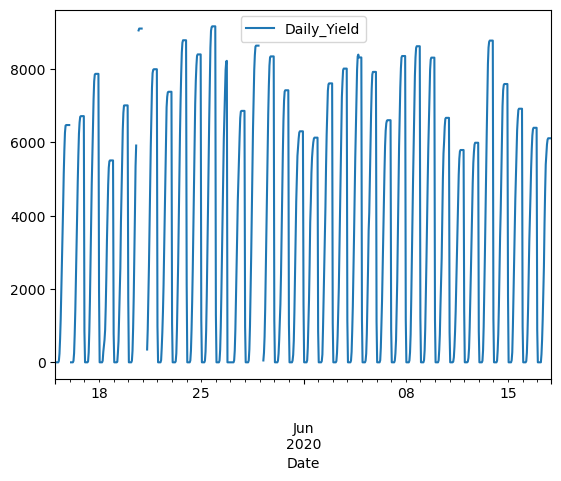

In [42]:
daily_yield.plot()
pyplot.show()


## Box-Cox Transform
Data transforms are intended to remove noise and improve the signal in time series forecasting min the case of Box-cox transform we can set the lambda parameter to None (the default) and let the function find a statistically tuned value and it's returning both the transformed dataset and the chosen lambda value.
+ I apply the BOX-Cox transform and saves the changes as a CSV file  to use it in further modeling and analysing :

Lambda: 0.7100796056179749


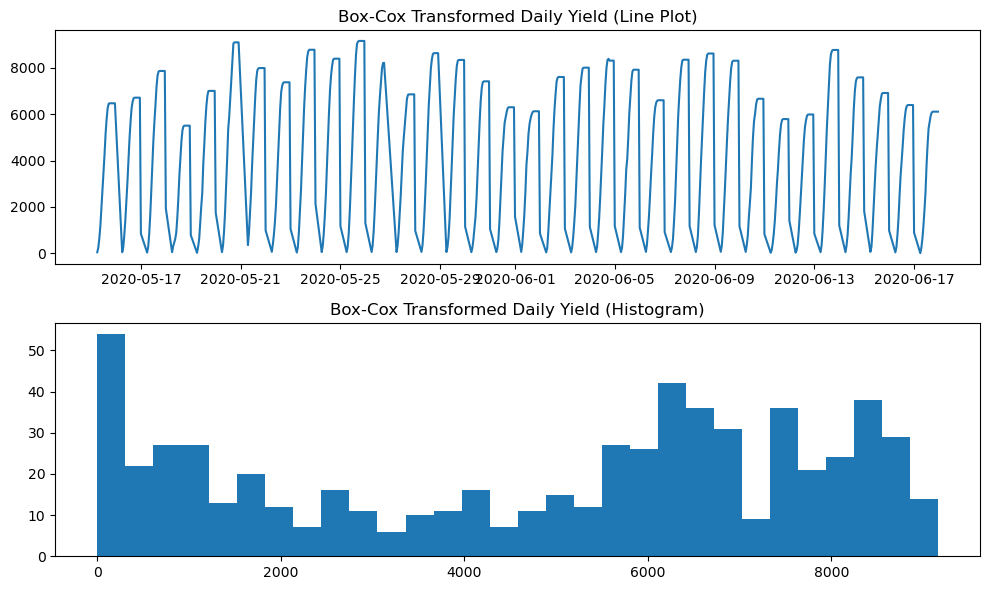

Transformed data saved to 'Daily_Yield_Transformed.csv'


In [44]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from matplotlib import pyplot

# Load the solar power generation dataset
df = pd.read_csv('Daily_Yield_Data.csv')

# Convert 'DATE_TIME' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'DATE_TIME' as the index
df.set_index('Date', inplace=True)

# Ensure the 'DAILY_YIELD' column is numeric
df['Daily_Yield'] = pd.to_numeric(df['Daily_Yield'], errors='coerce')

# Drop rows with NaN values in the 'DAILY_YIELD' column (if any)
df = df.dropna(subset=['Daily_Yield'])

# Remove non-positive values (keep only positive numbers)
df = df[df['Daily_Yield'] > 0]

# Apply Box-Cox transformation
df['daily_yield'], lam = boxcox(df['Daily_Yield'])
print('Lambda:', lam)

# Plot the transformed data
pyplot.figure(figsize=(10, 6))

# Line plot
pyplot.subplot(211)
pyplot.plot(df['Daily_Yield'])
pyplot.title('Box-Cox Transformed Daily Yield (Line Plot)')

# Histogram
pyplot.subplot(212)
pyplot.hist(df['Daily_Yield'], bins=30)
pyplot.title('Box-Cox Transformed Daily Yield (Histogram)')

# Show the plots
pyplot.tight_layout()
pyplot.show()

# Save the updated DataFrame with the transformed column to a CSV file
df.to_csv('Daily_Yield_Transformed.csv', index=True)

print("Transformed data saved to 'Daily_Yield_Transformed.csv'")

Running the example discovers the lambda value of 0.71. We can see that this A λ value close to 1 (but less than 1) implies that the original data has moderate positive skewness .This means the distribution likely has a long right tail (a few high values pulling the mean higher than the median).

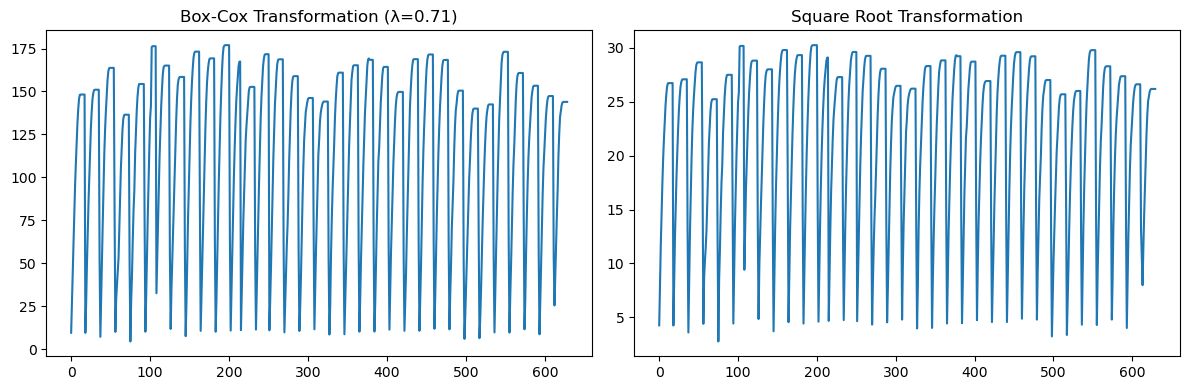

In [46]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv('Daily_Yield_Transformed.csv')

# Step 2: Extract the 'DAILY_YIELD' column (replace 'DAILY_YIELD' with your actual column name)
daily_yield = df['daily_yield']

# Step 3: Ensure the data is numeric and positive
daily_yield = pd.to_numeric(daily_yield, errors='coerce')  # Convert non-numeric values to NaN
daily_yield = daily_yield.dropna()  # Remove NaN values
daily_yield = daily_yield[daily_yield > 0]  # Keep only positive values

# Step 4: Apply the Box-Cox transformation with λ=0.63
transformed_data = boxcox(daily_yield, lmbda= 0.71)

# Alternative: Apply the square root transformation
sqrt_transformed = np.sqrt(daily_yield)

# Compare the transformations visually
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Box-Cox Transformation (λ=0.71)")
plt.plot(transformed_data)

plt.subplot(1, 2, 2)
plt.title("Square Root Transformation")
plt.plot(sqrt_transformed)

plt.tight_layout()
plt.show()


Both transformations reduce skewness and stabilize variance, but the Box-Cox transformation (λ=0.71) is more flexible and tailored to the data, while the square root transformation is simpler and achieves similar results.


# Moving average 
## Moving Average as *Data Preparation*

Date
2020-05-15 06:00:00     18.152230
2020-05-15 07:00:00     67.121806
2020-05-15 08:00:00    137.264646
2020-05-15 09:00:00    212.423222
2020-05-15 10:00:00    302.524010
2020-05-15 11:00:00    388.261425
2020-05-15 12:00:00    463.664350
2020-05-15 13:00:00    530.075687
2020-05-15 14:00:00    606.671669
2020-05-15 15:00:00    659.284096
Name: daily_yield, dtype: float64
Date
2020-05-15 06:00:00           NaN
2020-05-15 07:00:00           NaN
2020-05-15 08:00:00     74.179561
2020-05-15 09:00:00    138.936558
2020-05-15 10:00:00    217.403959
2020-05-15 11:00:00    301.069552
2020-05-15 12:00:00    384.816595
2020-05-15 13:00:00    460.667154
2020-05-15 14:00:00    533.470569
2020-05-15 15:00:00    598.677151
Name: daily_yield, dtype: float64


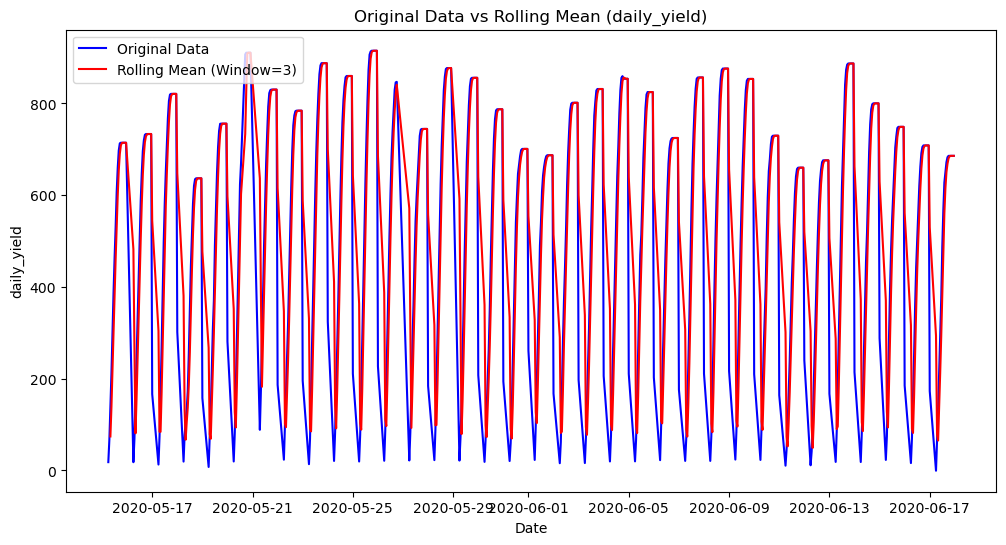

In [49]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
df = pd.read_csv('Daily_Yield_Transformed.csv')


# Convert 'DATE_TIME' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %H:%M:%S")

# Set 'DATE_TIME' as the index
df.set_index('Date', inplace=True)

# Select the column to analyze
column_to_analyze = 'daily_yield'
series = df[column_to_analyze]

# Print the first 10 rows of the data
print(series.head(10))

# Calculate the rolling mean (moving average)
window_size = 3  # Window size in days
rolling_mean = series.rolling(window=window_size).mean()

# Print the first 10 rows of the rolling mean
print(rolling_mean.head(10))

# Plot the original and rolling mean in the same figure
plt.figure(figsize=(12, 6))

# Plot the original series
plt.plot(series.index, series.values, label='Original Data', color='blue')

# Plot the rolling mean
plt.plot(series.index, rolling_mean.values, label=f'Rolling Mean (Window={window_size})', color='red')

# Add title, labels, and legend
plt.title(f'Original Data vs Rolling Mean ({column_to_analyze})')
plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.legend()

# Show the plot
plt.show()


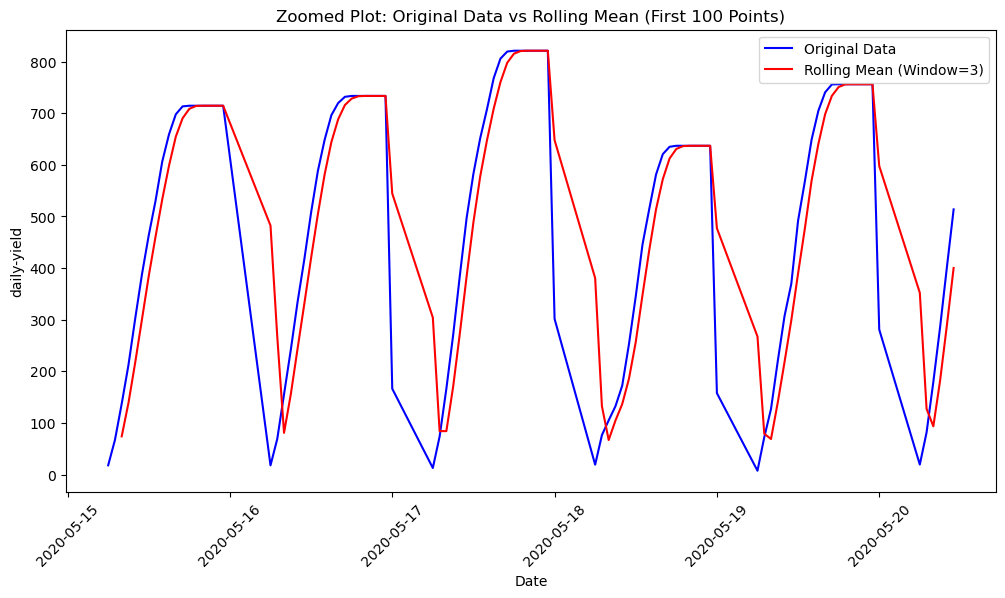

In [50]:
# Plot the zoomed-in view of the first 100 data points
plt.figure(figsize=(12, 6))

# Plot the original series for the first 100 data points
plt.plot(series.index[:100], series.values[:100], label='Original Data', color='blue')

# Plot the rolling mean for the first 100 data points
plt.plot(series.index[:100], rolling_mean.values[:100], label='Rolling Mean (Window=3)', color='red')

# Add title, labels, and legend
plt.title('Zoomed Plot: Original Data vs Rolling Mean (First 100 Points)')
plt.xlabel('Date')
plt.ylabel('daily-yield')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

## Moving Average as *Feature Engineering*

In [52]:
from pandas import DataFrame,concat
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag2 = df.shift(2)
lag3 = df.shift(3)
window = lag1.rolling(window=width)

means = window.mean()
dataframe = concat([means,lag3,lag2, lag1, df], axis=1)
dataframe.columns = ['mean','t-3', 't-2', 't-1','t']
print(dataframe.head(10))


         mean         t-3         t-2         t-1           t
0         NaN         NaN         NaN         NaN   18.152230
1         NaN         NaN         NaN   18.152230   67.121806
2         NaN         NaN   18.152230   67.121806  137.264646
3   74.179561   18.152230   67.121806  137.264646  212.423222
4  138.936558   67.121806  137.264646  212.423222  302.524010
5  217.403959  137.264646  212.423222  302.524010  388.261425
6  301.069552  212.423222  302.524010  388.261425  463.664350
7  384.816595  302.524010  388.261425  463.664350  530.075687
8  460.667154  388.261425  463.664350  530.075687  606.671669
9  533.470569  463.664350  530.075687  606.671669  659.284096


In [53]:
from pandas import DataFrame,concat
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag2 = df.shift(2)
lag3 = df.shift(3)
window = lag1.rolling(window=width)
means = window.mean()
dataframe = concat([means, df], axis=1)
dataframe.columns = ['mean','t']
print(dataframe.head(10))

         mean           t
0         NaN   18.152230
1         NaN   67.121806
2         NaN  137.264646
3   74.179561  212.423222
4  138.936558  302.524010
5  217.403959  388.261425
6  301.069552  463.664350
7  384.816595  530.075687
8  460.667154  606.671669
9  533.470569  659.284096


## Moving Average as *Prediction*

For the MA as prediction i tried many different window size and here is what i came to conclude : 
+ a window size of 1 hour provides the best performance. This suggests that the model benefits from focusing on immediate, short-term variations in solar power generation, rather than incorporating larger windows that average out daily fluctuations.
+ Window size of 24 hours: The larger window size, which includes data from an entire day, resulted in poorer performance. This is because it averaged the data too much, missing out on the important diurnal patterns (e.g., peak solar power generation during midday).
+ Window size of 2-6 hours: These window sizes showed some improvement over larger windows, capturing short-term trends without smoothing out too much detail.

predicted=18.15, expected=67.12
predicted=67.12, expected=137.26
predicted=137.26, expected=212.42
predicted=212.42, expected=302.52
predicted=302.52, expected=388.26
predicted=388.26, expected=463.66
predicted=463.66, expected=530.08
predicted=530.08, expected=606.67
predicted=606.67, expected=659.28
predicted=659.28, expected=697.77
predicted=697.77, expected=713.12
predicted=713.12, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=18.02
predicted=18.02, expected=69.26
predicted=69.26, expected=155.60
predicted=155.60, expected=241.56
predicted=241.56, expected=334.18
predicted=334.18, expected=416.91
predicted=416.91, expected=507.42
predicted=507.42, expected=587.73
predicted=587.73, expected=648.30
predicted=648.30, expected=696.06
predicted=696.06, expected=719.55
predicted=719.55, expected=731.65
predicted=731.65, exp

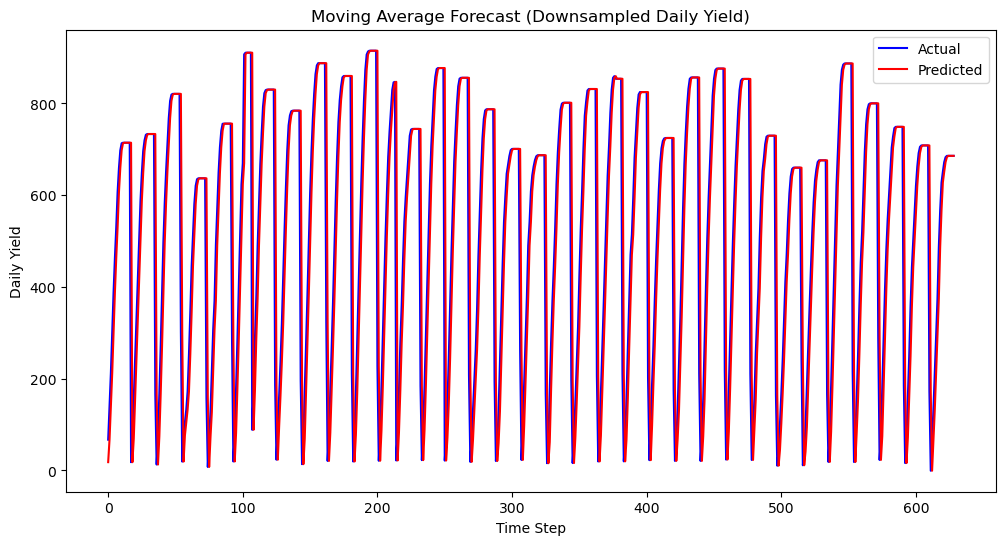

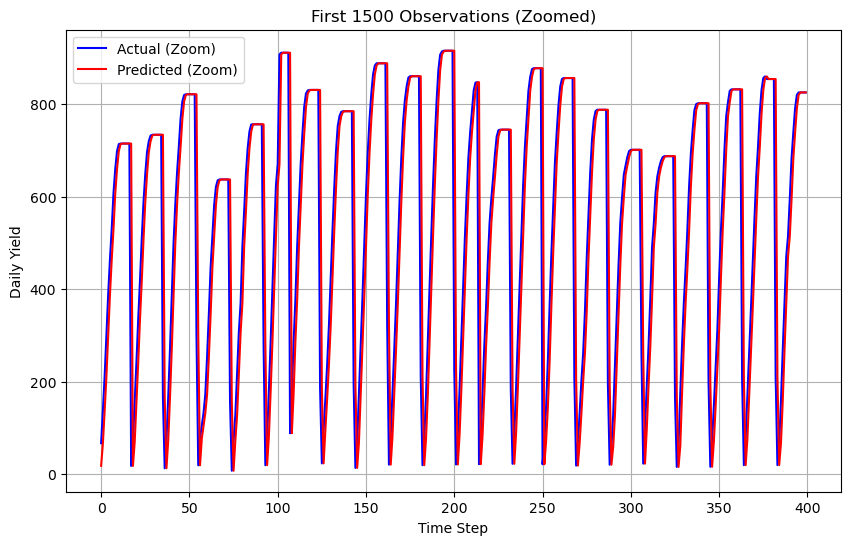

In [56]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd

# Load the dataset
df = read_csv('Daily_Yield_Transformed.csv')


# Convert 'DATE_TIME' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')


# Set 'DATE_TIME' as index
df.set_index('Date', inplace=True)


# Handle any non-numeric values in DAILY_YIELD (convert to NaN, then drop rows with NaN)
df['daily_yield'] = pd.to_numeric(df['daily_yield'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['daily_yield'], inplace=True)

# Prepare the data
series = df['daily_yield']
X = series.values
window = 1# Window size for moving average
history = [X[i] for i in range(window)]  # Initialize history
test = [X[i] for i in range(window, len(X))]  # Test set
predictions = []

# Walk forward over time steps in the test set
for t in range(len(test)):
    yhat = mean(history[-window:])  # Moving average prediction
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%.2f, expected=%.2f' % (yhat, obs))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Moving Average Forecast (Downsampled Daily Yield)')
plt.xlabel('Time Step')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()

# Zoom on first 100 or 1500 values (as needed)
plt.figure(figsize=(10, 6))
plt.plot(test[:400], label='Actual (Zoom)', color='blue')
plt.plot(predictions[:400], color='red', label='Predicted (Zoom)')
plt.title('First 1500 Observations (Zoomed)')
plt.xlabel('Time Step')
plt.ylabel("Daily Yield")
plt.legend()
plt.grid(True)
plt.show()


predicted=429.92, expected=507.42
predicted=450.31, expected=587.73
predicted=472.00, expected=648.30
predicted=493.29, expected=696.06
predicted=513.45, expected=719.55
predicted=530.82, expected=731.65
predicted=545.13, expected=733.37
predicted=556.37, expected=733.37
predicted=564.84, expected=733.37
predicted=570.12, expected=733.37
predicted=573.20, expected=733.37
predicted=574.69, expected=733.37
predicted=575.53, expected=166.43
predicted=552.70, expected=12.94
predicted=523.47, expected=73.63
predicted=496.77, expected=166.34
predicted=473.94, expected=269.79
predicted=455.42, expected=386.16
predicted=441.74, expected=497.33
predicted=461.71, expected=582.62
predicted=483.10, expected=651.28
predicted=503.75, expected=707.30
predicted=523.16, expected=767.80
predicted=541.23, expected=805.63
predicted=557.42, expected=819.28
predicted=570.42, expected=820.89
predicted=580.13, expected=820.89
predicted=587.32, expected=820.89
predicted=592.52, expected=820.89
predicted=596.75

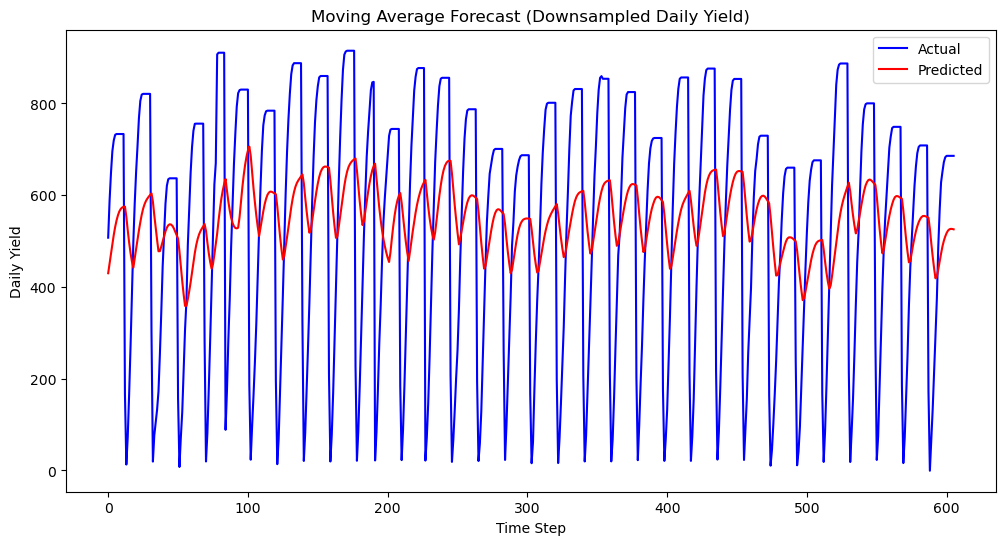

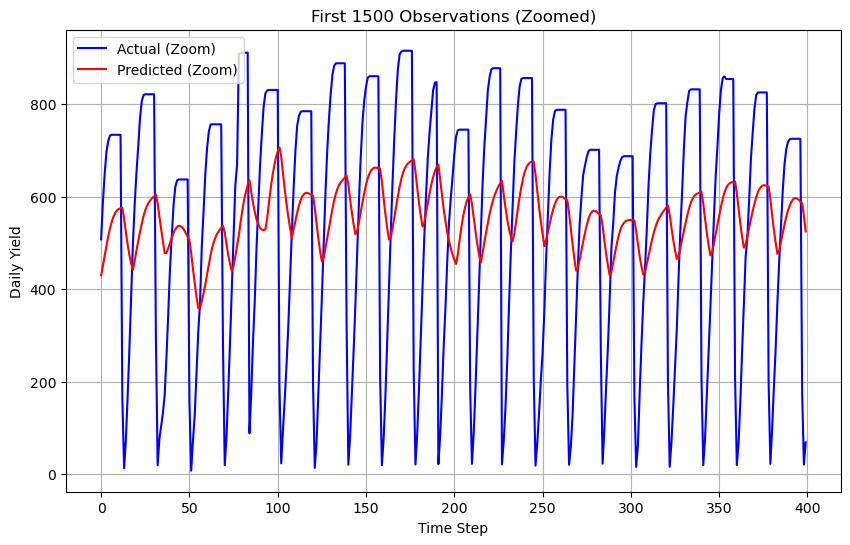

In [57]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd

# Load the dataset
df = read_csv('Daily_Yield_Transformed.csv')


# Convert 'DATE_TIME' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')


# Set 'DATE_TIME' as index
df.set_index('Date', inplace=True)


# Handle any non-numeric values in DAILY_YIELD (convert to NaN, then drop rows with NaN)
df['daily_yield'] = pd.to_numeric(df['daily_yield'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['daily_yield'], inplace=True)

# Prepare the data
series = df['daily_yield']
X = series.values
window = 24# Window size for moving average
history = [X[i] for i in range(window)]  # Initialize history
test = [X[i] for i in range(window, len(X))]  # Test set
predictions = []

# Walk forward over time steps in the test set
for t in range(len(test)):
    yhat = mean(history[-window:])  # Moving average prediction
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%.2f, expected=%.2f' % (yhat, obs))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Moving Average Forecast (Downsampled Daily Yield)')
plt.xlabel('Time Step')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()

# Zoom on first 100 or 1500 values (as needed)
plt.figure(figsize=(10, 6))
plt.plot(test[:400], label='Actual (Zoom)', color='blue')
plt.plot(predictions[:400], color='red', label='Predicted (Zoom)')
plt.title('First 1500 Observations (Zoomed)')
plt.xlabel('Time Step')
plt.ylabel("Daily Yield")
plt.legend()
plt.grid(True)
plt.show()


predicted=74.18, expected=212.42
predicted=138.94, expected=302.52
predicted=217.40, expected=388.26
predicted=301.07, expected=463.66
predicted=384.82, expected=530.08
predicted=460.67, expected=606.67
predicted=533.47, expected=659.28
predicted=598.68, expected=697.77
predicted=654.58, expected=713.12
predicted=690.06, expected=714.38
predicted=708.42, expected=714.38
predicted=713.96, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=714.38
predicted=714.38, expected=18.02
predicted=482.26, expected=69.26
predicted=267.22, expected=155.60
predicted=80.96, expected=241.56
predicted=155.47, expected=334.18
predicted=243.78, expected=416.91
predicted=330.88, expected=507.42
predicted=419.50, expected=587.73
predicted=504.02, expected=648.30
predicted=581.15, expected=696.06
predicted=644.03, expected=719.55
predicted=687.97, expected=731.65
predicted=715.75, expected=733.37
predicted=728.19, expected=733.37
predicted=732.79, 

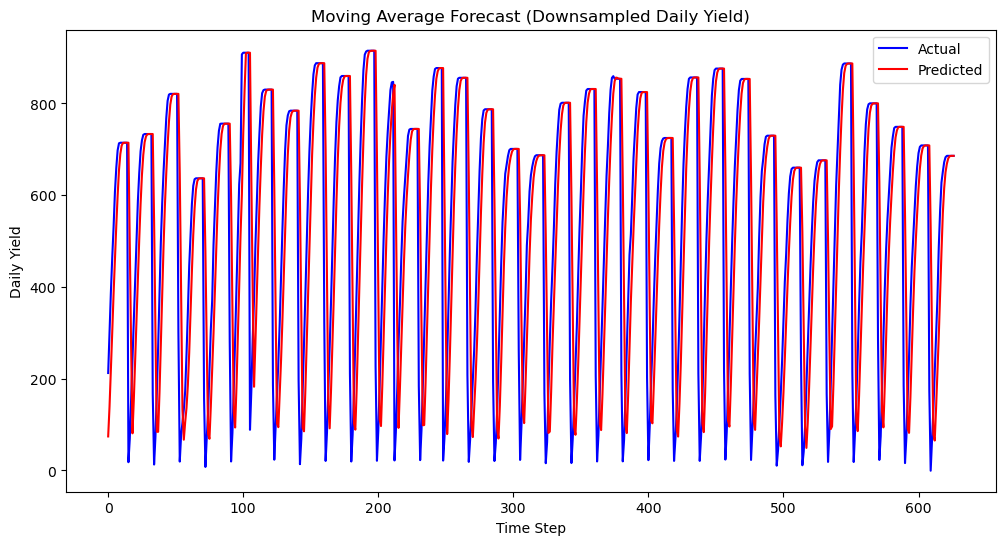

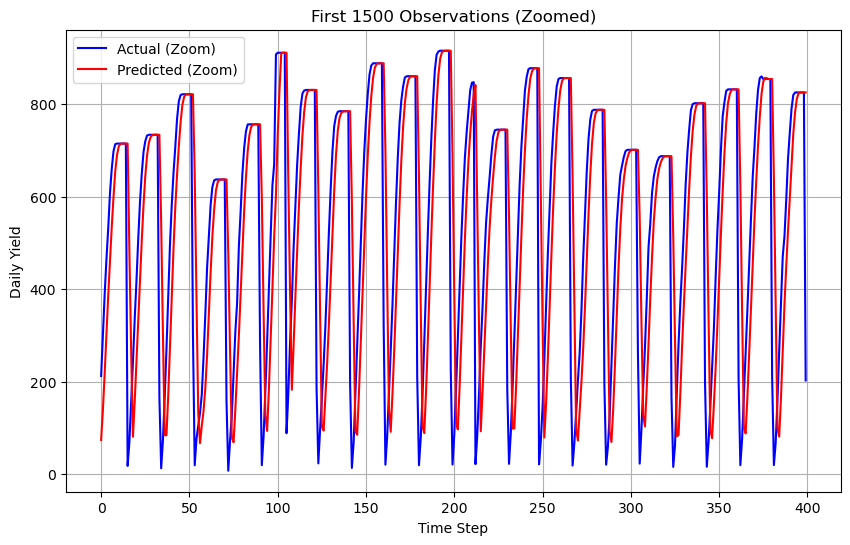

In [58]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd

# Load the dataset
df = read_csv('Daily_Yield_Transformed.csv')


# Convert 'DATE_TIME' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')


# Set 'DATE_TIME' as index
df.set_index('Date', inplace=True)


# Handle any non-numeric values in DAILY_YIELD (convert to NaN, then drop rows with NaN)
df['daily_yield'] = pd.to_numeric(df['daily_yield'], errors='coerce')

# Drop rows with NaN values
df.dropna(subset=['daily_yield'], inplace=True)

# Prepare the data
series = df['daily_yield']
X = series.values
window = 3# Window size for moving average
history = [X[i] for i in range(window)]  # Initialize history
test = [X[i] for i in range(window, len(X))]  # Test set
predictions = []

# Walk forward over time steps in the test set
for t in range(len(test)):
    yhat = mean(history[-window:])  # Moving average prediction
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%.2f, expected=%.2f' % (yhat, obs))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot actual vs. predicted
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Moving Average Forecast (Downsampled Daily Yield)')
plt.xlabel('Time Step')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()

# Zoom on first 100 or 1500 values (as needed)
plt.figure(figsize=(10, 6))
plt.plot(test[:400], label='Actual (Zoom)', color='blue')
plt.plot(predictions[:400], color='red', label='Predicted (Zoom)')
plt.title('First 1500 Observations (Zoomed)')
plt.xlabel('Time Step')
plt.ylabel("Daily Yield")
plt.legend()
plt.grid(True)
plt.show()


 ## Time Series  Decomposition 
 #### Multiplicative decomposition
 Since the seasonal variations seem to increase with the trend, the multiplicative model is the better choice for my data because :
+ The amplitude of the seasonal fluctuations (diurnal cycle) depends on the overall production level.
+ The relationship between the trend and seasonality is multiplicative rather than additive.


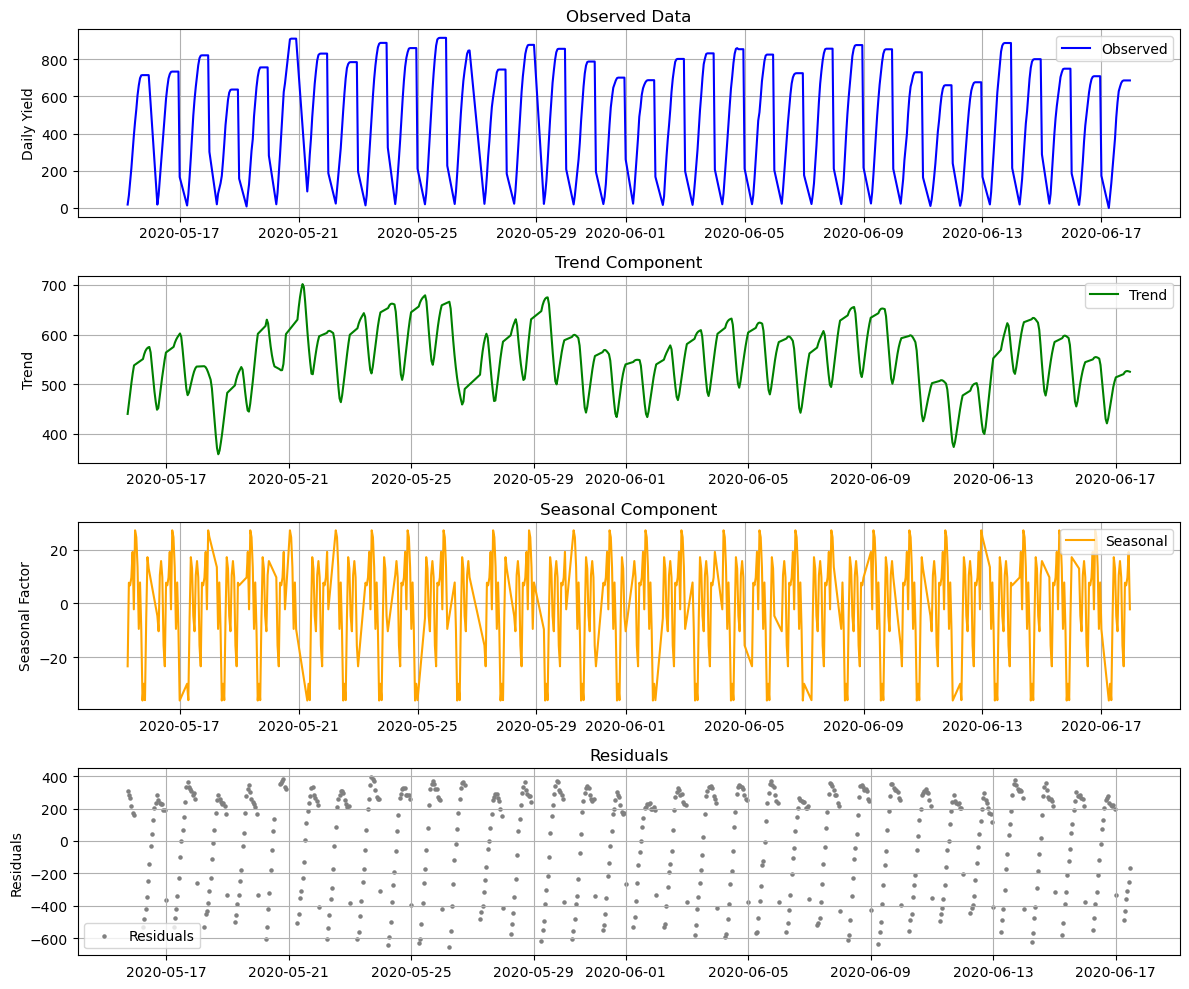

In [60]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform multiplicative decomposition
result = seasonal_decompose(series, model='additive', period=24)

# Create a larger figure for better visibility
plt.figure(figsize=(12, 10))

# Top Panel: Observed Data
plt.subplot(411)
plt.plot(result.observed, color='blue', label='Observed')
plt.title('Observed Data')
plt.ylabel('Daily Yield')
plt.grid(True)
plt.legend()

# Second Panel: Trend
plt.subplot(412)
plt.plot(result.trend, color='green', label='Trend')
plt.title('Trend Component')
plt.ylabel('Trend')
plt.grid(True)
plt.legend()

# Third Panel: Seasonal
plt.subplot(413)
plt.plot(result.seasonal, color='orange', label='Seasonal')
plt.title('Seasonal Component')
plt.ylabel('Seasonal Factor')
plt.grid(True)
plt.legend()

# Bottom Panel: Residuals
plt.subplot(414)
plt.scatter(result.resid.index, result.resid, color='gray', s=5, label='Residuals')
plt.title('Residuals')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

I choOse a period of 24 because the data is aggregated at an hourly level, and solar energy production follows a daily seasonal cycle with one full pattern (peaks during daylight and troughs at night) repeating every 24 hours.

# Understanding Trend and Seasonality 
Identifying and understanding trend information can aid in improving model performance

Time series are stationary if they do not have trend or seasonal effects ;observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

In [63]:
# upsample to daily intervals
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime('200'+x, '%Y-%m')

# Read the CSV file
series = read_csv('Daily_Yield_Transformed.csv', header=0)

series

Date  Daily_Yield  daily_yield
0    2020-05-15 06:00:00    40.666667    18.152230
1    2020-05-15 07:00:00   237.714286    67.121806
2    2020-05-15 08:00:00   641.428571   137.264646
3    2020-05-15 09:00:00  1180.375000   212.423222
4    2020-05-15 10:00:00  1936.750000   302.524010
..                   ...          ...          ...
625  2020-06-17 19:00:00  6110.000000   685.792434
626  2020-06-17 20:00:00  6110.000000   685.792434
627  2020-06-17 21:00:00  6110.000000   685.792434
628  2020-06-17 22:00:00  6110.000000   685.792434
629  2020-06-17 23:00:00  6110.000000   685.792434

[630 rows x 3 columns]

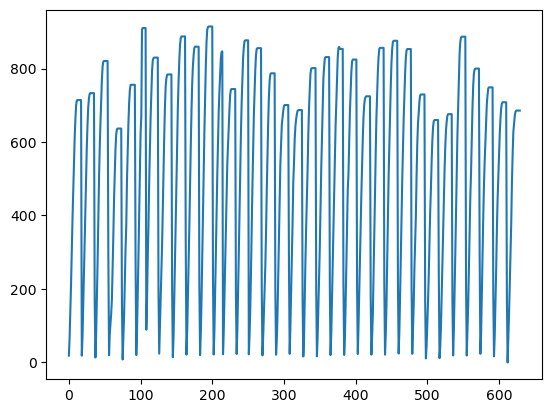

In [64]:
pyplot.plot(series['daily_yield'])
pyplot.show()

Date
2020-05-15 06:00:00     18.152230
2020-05-15 07:00:00     67.121806
2020-05-15 08:00:00    137.264646
2020-05-15 09:00:00    212.423222
2020-05-15 10:00:00    302.524010
                          ...    
2020-06-17 19:00:00    685.792434
2020-06-17 20:00:00    685.792434
2020-06-17 21:00:00    685.792434
2020-06-17 22:00:00    685.792434
2020-06-17 23:00:00    685.792434
Name: daily_yield, Length: 630, dtype: float64
[[1.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 1.00000e+00 1.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00]
 ...
 [1.00000e+00 6.27000e+02 3.93129e+05]
 [1.00000e+00 6.28000e+02 3.94384e+05]
 [1.00000e+00 6.29000e+02 3.95641e+05]]


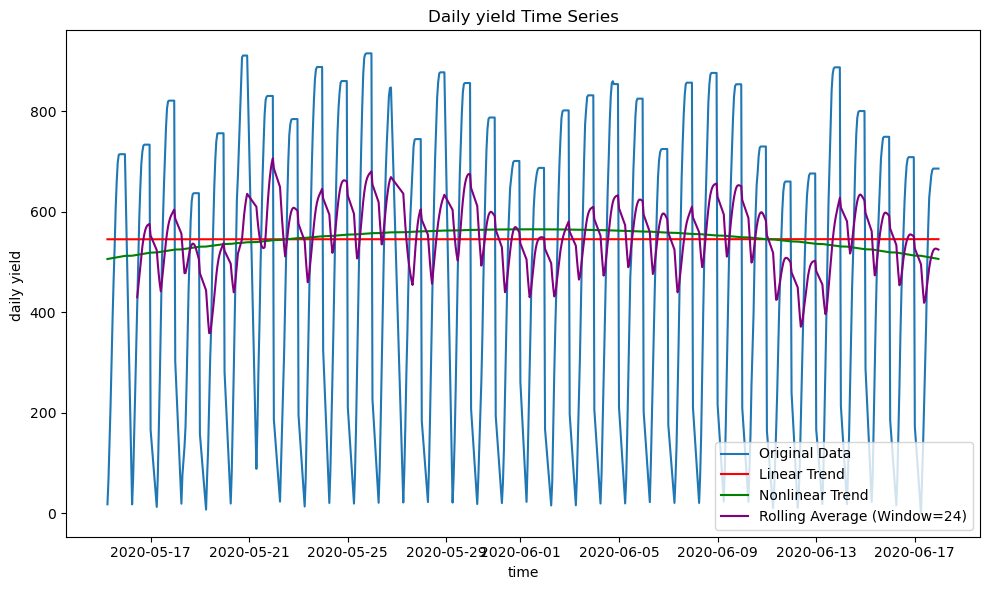

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the time series data
# Load the time series data
series = pd.read_csv('Daily_Yield_Transformed.csv',  
                     header=0,  
                     index_col=0,  
                     parse_dates=True)

# Prepare the data
series = series['daily_yield']
print(series)
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(series, label='Original Data')
plt.title('Daily yield Time Series')
plt.xlabel('time')
plt.ylabel('daily yield ')
plt.legend()

# Add a linear trend line
X = np.arange(len(series)).reshape(-1, 1)  # Time steps as features
y = series.values.reshape(-1, 1)  # Passengers as target
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_trend = linear_model.predict(X)
plt.plot(series.index, linear_trend, label='Linear Trend', color='red')

# Add a nonlinear trend line (e.g., polynomial)
poly_features = PolynomialFeatures(degree=2)  # Quadratic trend
X_poly = poly_features.fit_transform(X)
print(X_poly)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_trend = poly_model.predict(X_poly)
plt.plot(series.index, poly_trend, label='Nonlinear Trend', color='green')

# Add a rolling average (smoothing)
window_size = 24
rolling_avg = series.rolling(window=window_size).mean()
plt.plot(series.index, rolling_avg, label=f'Rolling Average (Window={window_size})', color='purple')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

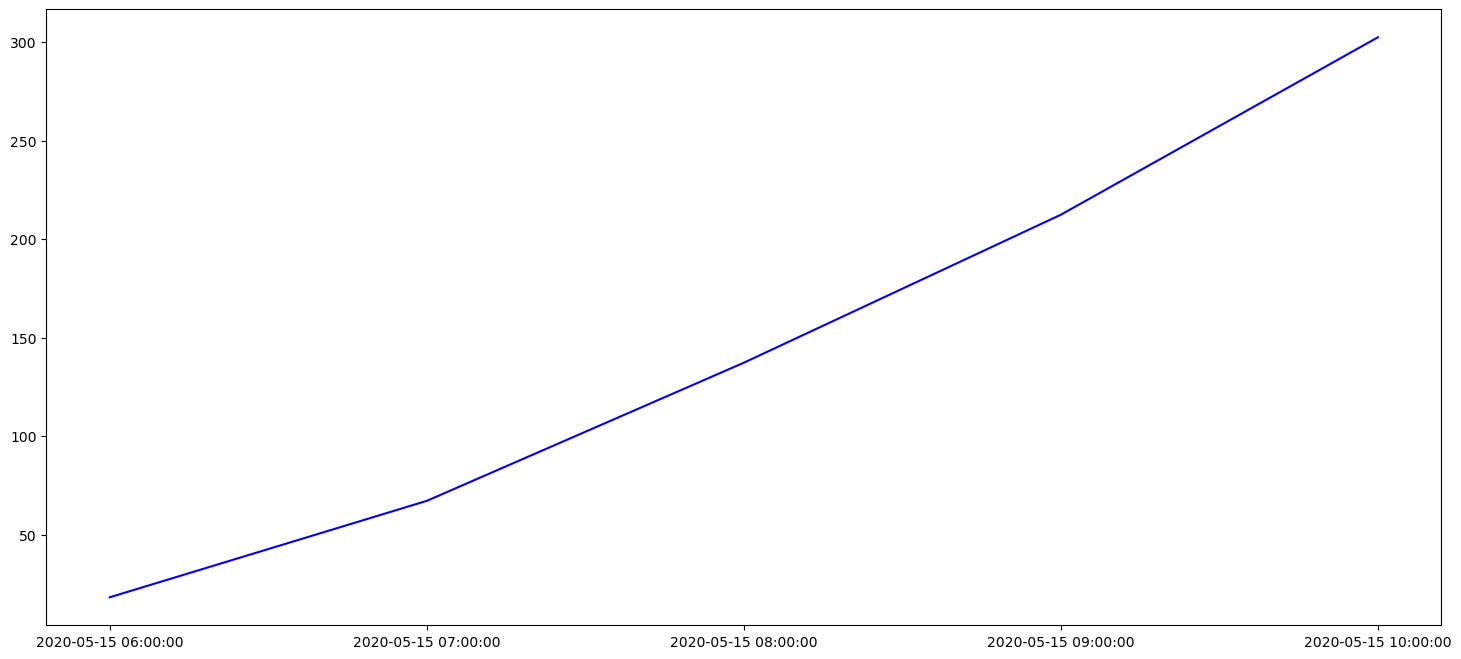

In [66]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

# Load the time series data
series = read_csv(
  'Daily_Yield_Transformed.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    date_format="%d-%m-%Y %H:%M"  # Adjust the date format as needed
)
series = series['daily_yield']
# Plot the data
plt.figure(figsize=(18,8))  # Adjust the figure size for better readability
# Plot the original series for the first 100 data points
plt.plot(series.index[:5], series.values[:5], label='sampled data', color='blue')
plt.show()

In [67]:
# Summary Statistics

X = series.values
split = int(len(X) / 3)
X1, X2, X3, X4 = X[0:split], X[split:split+100], X[split+100:], X[split+100:]
mean1, mean2,mean3,mean4 = X1.mean(), X2.mean(), X3.mean() ,X4.mean()
var1, var2,var3,var4 = X1.var(), X2.var(),X3.var(),X4.var()
print('mean1=%f, mean2=%f, mean3=%f,mean4=%f' % (mean1, mean2,mean3,mean3))

print('variance1=%f, variance2=%f, variance3=%f,variance4=%f '% (var1, var2,var3,var4))

mean1=546.778595, mean2=552.852772, mean3=541.948749,mean4=541.948749
variance1=82574.753606, variance2=80978.372084, variance3=74829.303974,variance4=74829.303974 


In [68]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.417463
p-value: 0.000276
	1%: -3.441
	5%: -2.866
	10%: -2.569


from the plots that we used , it seems there is no trend or seasonal patterns , also from the statistics test and summary we conclude that our data is **stationnary** 

## Spliting 

**Train-Test Split**
We can split our dataset into training and testing subsets. our model can be prepared on the training dataset and predictions can be made and evaluated for the test dataset. This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets. Depending on the amount of data We have available and the amount of data required, you can use splits of 50-50, 70-30 and 90-10.

Observations: 630
Training Observations: 504
Testing Observations: 126


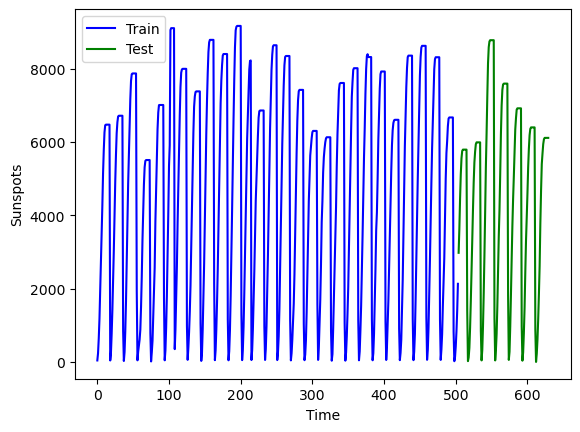

In [72]:
import matplotlib.pyplot as plt
from pandas import read_csv

# Load the dataset
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True, date_format="%d-%m-%Y %H:%M")

# Extract the sunspot values as a 1D array
X = series['Daily_Yield'].values  # Replace 'Sunspots' with the actual column name

# Perform train-test split
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:len(X)]

# Print observations
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

# Plot training data in blue
plt.plot(train, color='blue', label='Train')

# Plot test data in green
plt.plot(range(len(train), len(train) + len(test)), test, color='green', label='Test')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.legend()

# Show the plot
plt.show()

**Multiple Train-Test Splits**
We can repeat the process of splitting the time series into train and test sets multiple times.
This will require multiple models to be trained and evaluated, but this additional computational
expense will provide a more robust estimate of the expected performance of the chosen method
and configuration on unseen data. We could do this manually by repeating the process described
in the previous section with different split points.

Split 1:
Observations: 316
Training Observations: 159
Testing Observations: 157
Split 2:
Observations: 473
Training Observations: 316
Testing Observations: 157
Split 3:
Observations: 630
Training Observations: 473
Testing Observations: 157


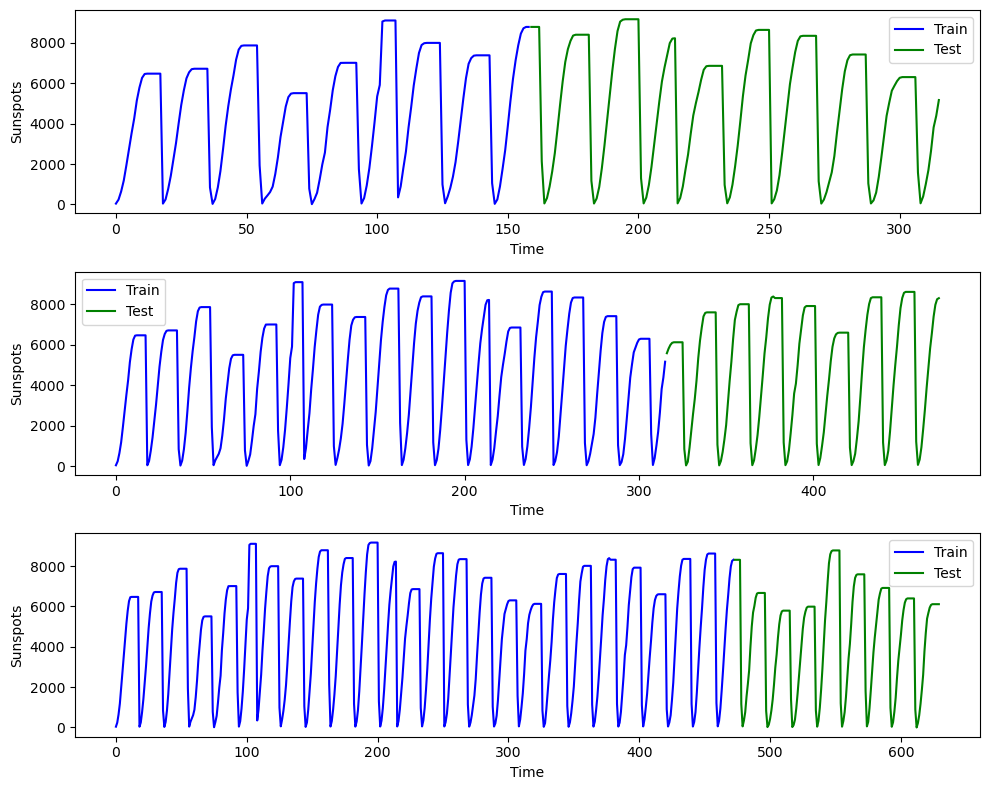

In [74]:
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit

# Load the dataset
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True, date_format="%d-%m-%Y %H:%M")


# Extract the sunspot values as a 1D array
X = series['Daily_Yield'].values
# Initialize TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

# Create a figure for the plots
plt.figure(figsize=(10, 8))

# Loop through each split
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    
    # Print observations
    print(f'Split {index}:')
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    
    # Plot training data in blue
    plt.subplot(3, 1, index)
    plt.plot(train, color='blue', label='Train')
    
    # Plot test data in green
    plt.plot(range(len(train), len(train) + len(test)), test, color='green', label='Test')
#range(len(train), len(train) + len(test))

#This generates a sequence of x-values for plotting.
#It starts at len(train), which means the test data will be plotted right after the training data.
#It ends at len(train) + len(test) - 1, so the test data is placed sequentially in continuation of the training set.
    
    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Sunspots')
    plt.legend()
    
    # Increment subplot index
    index += 1

# Show the plot
plt.tight_layout()
plt.show()

**Walk Forward validation**
i choose to  work with the sliding window because : 
+ A sliding window focuses on recent data, which is more relevant for capturing short-term variability caused by weather.
+ It avoids including outdated data (e.g., from months ago) that may not reflect current conditions.

i also tried to implement both approaches and compare them:

In [76]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Load your time series data
data = pd.read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)
series = data['daily_yield']

# Define the walk-forward validation function
def walk_forward_validation(series, model, window_type='sliding', train_window_size=30):
    
    predictions = []
    actuals = []
    series_values = series.values
    
    for i in range(train_window_size, len(series_values)):
        if window_type == 'sliding':
            # Sliding window: Use a fixed-size training window
            train_data = series_values[i - train_window_size:i]
        elif window_type == 'expanding':
            # Expanding window: Use all data up to the current point
            train_data = series_values[:i]
        else:
            raise ValueError("window_type must be 'sliding' or 'expanding'")
        
        # Test data is the next point
        test_data = series_values[i]
        
        # Fit the model on the training data
        X_train = np.arange(len(train_data)).reshape(-1, 1)
        y_train = train_data
        model.fit(X_train, y_train)
        
        # Predict the next point
        X_test = np.array([[len(train_data)]])
        prediction = model.predict(X_test)[0]
        predictions.append(prediction)
        actuals.append(test_data)
    
    return predictions, actuals

# Initialize the model
model = LinearRegression()

# Perform walk-forward validation with sliding window
predictions_sliding, actuals_sliding = walk_forward_validation(series, model, window_type='sliding', train_window_size=30)

# Perform walk-forward validation with expanding window
predictions_expanding, actuals_expanding = walk_forward_validation(series, model, window_type='expanding')

# Evaluate performance
rmse_sliding = np.sqrt(mean_squared_error(actuals_sliding, predictions_sliding))
rmse_expanding = np.sqrt(mean_squared_error(actuals_expanding, predictions_expanding))

print(f"RMSE (Sliding Window): {rmse_sliding}")
print(f"RMSE (Expanding Window): {rmse_expanding}")

RMSE (Sliding Window): 267.0729659967103
RMSE (Expanding Window): 285.07549477435276


## Persistence Algorithm
The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1).

Lagged Dataset:
            t         t+1
0         NaN   18.152230
1   18.152230   67.121806
2   67.121806  137.264646
3  137.264646  212.423222
4  212.423222  302.524010
Test RMSE: 147.997


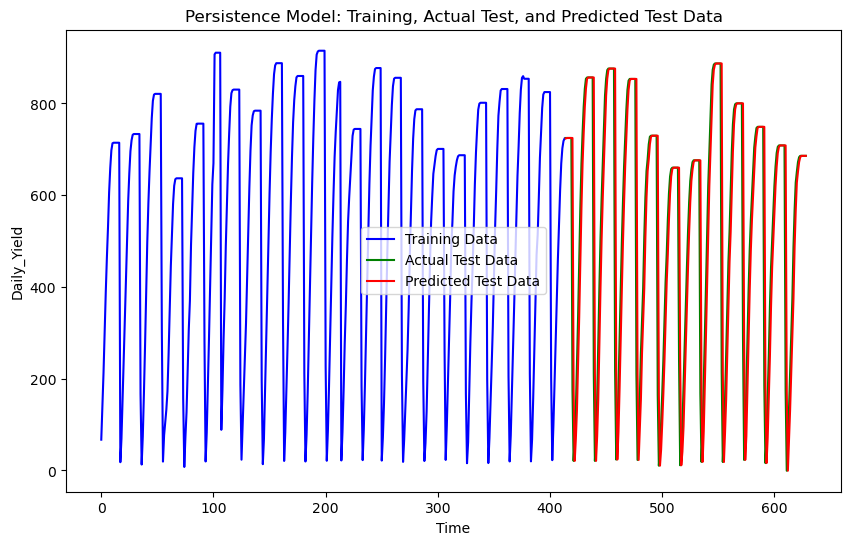

In [78]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True, date_format="%d-%m-%Y %H:%M")

# Extract the sunspot values as a DataFrame
values = DataFrame(series['daily_yield'].values)

# Create a lagged dataset (t and t+1)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Display the first 5 rows of the lagged dataset
print("Lagged Dataset:")
print(dataframe.head(5))

# Split into training and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)  # 66% for training
train, test = X[1:train_size], X[train_size:]  # Skip the first row (NaN due to lag)
train_X, train_y = train[:, 0], train[:, 1]  # Features (t) and target (t+1) for training
test_X, test_y = test[:, 0], test[:, 1]  # Features (t) and target (t+1) for testing

# Persistence model (predict t+1 = t)
def model_persistence(x):
    return x

# Walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)  # Predict t+1 = t
    predictions.append(yhat)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot the results
pyplot.figure(figsize=(10, 6))

# Plot training data
pyplot.plot(train_y, color='blue', label='Training Data')

# Plot actual test data
pyplot.plot(range(len(train_y), len(train_y) + len(test_y)), test_y, color='green', label='Actual Test Data')

# Plot predicted test data
pyplot.plot(range(len(train_y), len(train_y) + len(predictions)), predictions, color='red', label='Predicted Test Data')

# Add labels, title, and legend
pyplot.xlabel('Time')
pyplot.ylabel('Daily_Yield')
pyplot.title('Persistence Model: Training, Actual Test, and Predicted Test Data')
pyplot.legend()

# Show the plot
pyplot.show()

**Residual Forecast Errors**

          0
0  1.037745
1  0.000000
2  0.000000
3  0.000000
4  0.000000


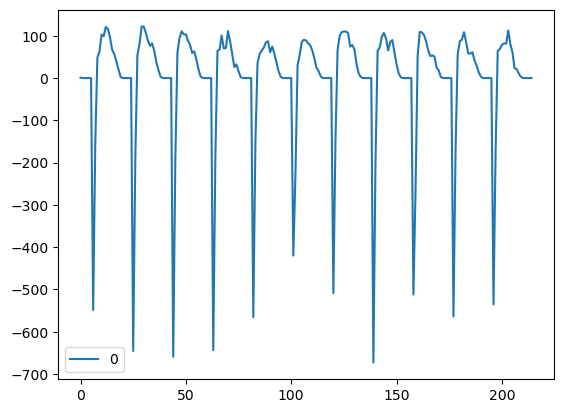

In [80]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())
# plot residuals
residuals.plot()
pyplot.show()


In [81]:
# Residual Summary Statistics
print(residuals.describe())


                0
count  215.000000
mean    -0.176232
std    148.342640
min   -672.867583
25%      0.000000
50%     24.289245
75%     73.536654
max    122.054339


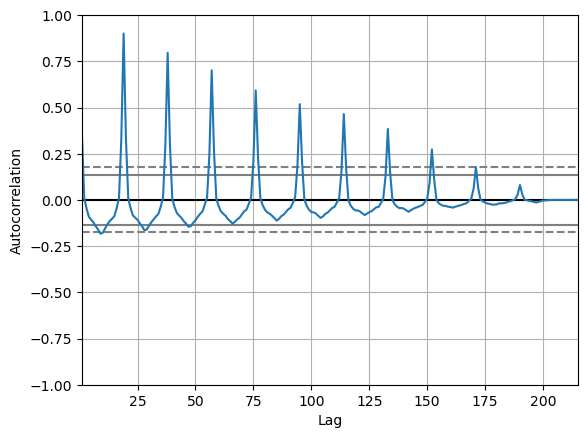

In [82]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)
pyplot.show()

 **Residual Q-Q Plot**
 
 The Q-Q plot can be used to quickly check the normality of the distribution of residual errors

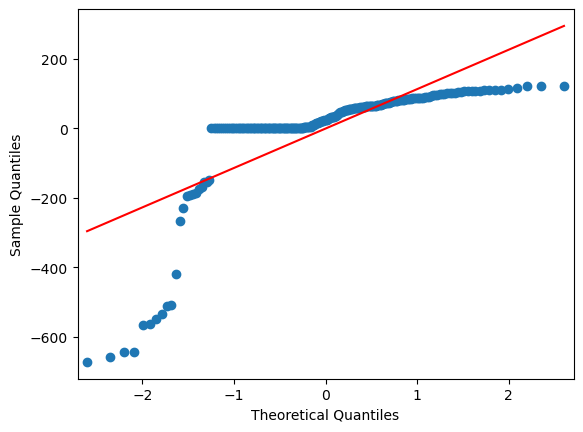

In [84]:
# qq plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)
values = DataFrame(series['daily_yield'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()



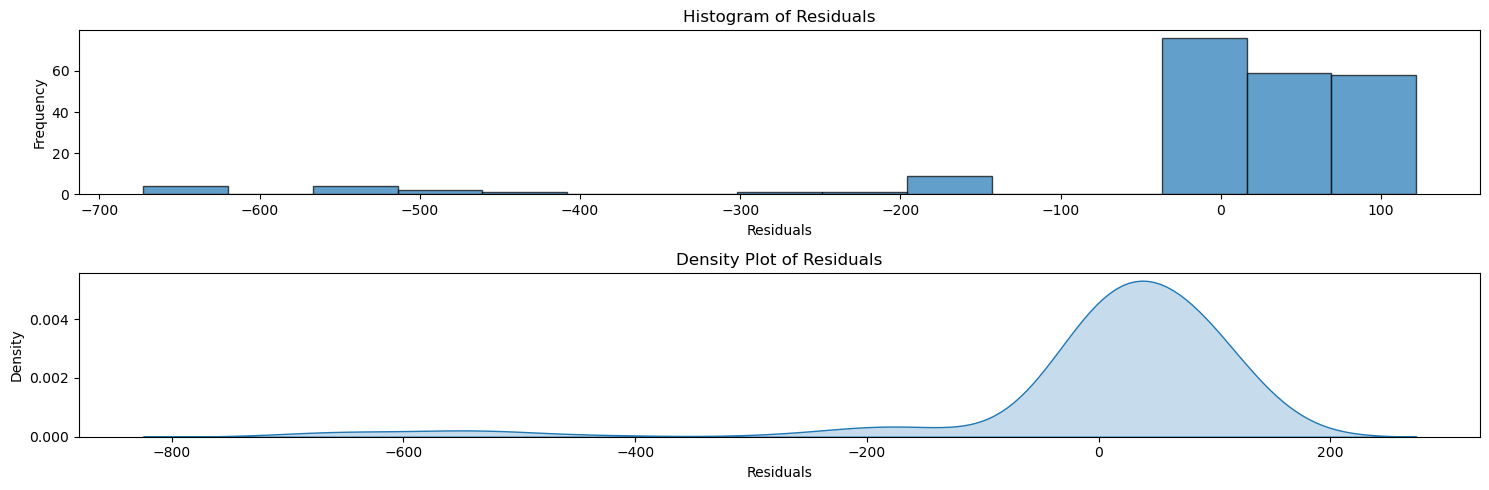

In [85]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

# Load the dataset
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)

# Create lagged dataset
values = DataFrame(series['daily_yield'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)  # 66% for training
train, test = X[1:train_size], X[train_size:]  # Skip the first row (NaN due to lag)
train_X, train_y = train[:, 0], train[:, 1]  # Features (t) and target (t+1) for training
test_X, test_y = test[:, 0], test[:, 1]  # Features (t) and target (t+1) for testing

# Persistence model (predict t+1 = t)
predictions = [x for x in test_X]

# Calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = np.array(residuals)

# Create a figure with subplots
pyplot.figure(figsize=(15, 5))


# Histogram of Residuals
pyplot.subplot(2, 1, 1)
pyplot.hist(residuals, bins=15, edgecolor='black', alpha=0.7)
pyplot.title('Histogram of Residuals')
pyplot.xlabel('Residuals')
pyplot.ylabel('Frequency')

# Density Plot of Residuals
pyplot.subplot(2, 1, 2)
sns.kdeplot(residuals, fill=True)  # Updated: `fill=True` instead of `shade=True`
pyplot.title('Density Plot of Residuals')
pyplot.xlabel('Residuals')
pyplot.ylabel('Density')

# Show the plots
pyplot.tight_layout()
pyplot.show()

## Reframe Time Series
 A reframing can ultimately result in better and/or more robust forecasts. Reframing your problem is the idea of exploring alternate perspectives on what is to be predicted
**Time Horizon** 
The time horizon is the number of time
steps in the future that are being predicted.

In [87]:
from pandas import concat

# Reframe the dataset for a 24-hour forecast horizon
dataframe = concat([values.shift(1), 
                    values.shift(-1), values.shift(-2), values.shift(-3),
                    values.shift(-4), values.shift(-5), values.shift(-6),
                    values.shift(-7), values.shift(-8), values.shift(-9),
                    values.shift(-10), values.shift(-11), values.shift(-12),
                    values.shift(-13), values.shift(-14), values.shift(-15),
                    values.shift(-16), values.shift(-17), values.shift(-18),
                    values.shift(-19), values.shift(-20), values.shift(-21),
                    values.shift(-22), values.shift(-23), values.shift(-24)], axis=1)

# Assign column names
dataframe.columns = ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7',
                     't+8', 't+9', 't+10', 't+11', 't+12', 't+13', 't+14',
                     't+15', 't+16', 't+17', 't+18', 't+19', 't+20', 't+21',
                     't+22', 't+23', 't+24']

# Print the first few rows
print(dataframe.head(14))

             t         t+1         t+2         t+3         t+4         t+5  \
0          NaN   67.121806  137.264646  212.423222  302.524010  388.261425   
1    18.152230  137.264646  212.423222  302.524010  388.261425  463.664350   
2    67.121806  212.423222  302.524010  388.261425  463.664350  530.075687   
3   137.264646  302.524010  388.261425  463.664350  530.075687  606.671669   
4   212.423222  388.261425  463.664350  530.075687  606.671669  659.284096   
5   302.524010  463.664350  530.075687  606.671669  659.284096  697.769452   
6   388.261425  530.075687  606.671669  659.284096  697.769452  713.115365   
7   463.664350  606.671669  659.284096  697.769452  713.115365  714.382371   
8   530.075687  659.284096  697.769452  713.115365  714.382371  714.382371   
9   606.671669  697.769452  713.115365  714.382371  714.382371  714.382371   
10  659.284096  713.115365  714.382371  714.382371  714.382371  714.382371   
11  697.769452  714.382371  714.382371  714.382371  714.382371  

In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt  # For RMSE calculation

# Drop rows with NaN values (due to shifting)
dataframe.dropna(inplace=True)

# Display the reframed DataFrame
print("Reframed DataFrame:")
print(dataframe)

# Define features (X) and target (y)
X = dataframe[['t']]  # Use lagged value as the feature
y = dataframe[[f't+{i}' for i in range(1, 25)]]  # Predict the next 24 hours (t+1 to t+24)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE for each horizon
rmse_values = []
for i in range(y_test.shape[1]):
    rmse = sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    rmse_values.append(rmse)
    print(f"RMSE for t+{i+1}: {rmse:.3f}")

# Combine actual vs predicted values into a results DataFrame
results = pd.DataFrame({
    f'Actual t+{i+1}': y_test.iloc[:, i] for i in range(y_test.shape[1])
})
results = pd.concat([
    results,
    pd.DataFrame({
        f'Predicted t+{i+1}': y_pred[:, i] for i in range(y_pred.shape[1])
    })
], axis=1)

# Display predictions vs actual values
print("\nPredictions vs Actual Values:")
print(results)

# Print the overall RMSE values for all horizons
print("\nOverall RMSE for Each Horizon:")
for i, rmse in enumerate(rmse_values):
    print(f"RMSE for t+{i+1}: {rmse:.3f}")

Reframed DataFrame:
              t         t+1         t+2         t+3         t+4         t+5  \
1     18.152230  137.264646  212.423222  302.524010  388.261425  463.664350   
2     67.121806  212.423222  302.524010  388.261425  463.664350  530.075687   
3    137.264646  302.524010  388.261425  463.664350  530.075687  606.671669   
4    212.423222  388.261425  463.664350  530.075687  606.671669  659.284096   
5    302.524010  463.664350  530.075687  606.671669  659.284096  697.769452   
..          ...         ...         ...         ...         ...         ...   
601  559.300113  662.237829  691.703395  705.258504  708.481506  708.481506   
602  620.323786  691.703395  705.258504  708.481506  708.481506  708.481506   
603  662.237829  705.258504  708.481506  708.481506  708.481506  708.481506   
604  691.703395  708.481506  708.481506  708.481506  708.481506  708.481506   
605  705.258504  708.481506  708.481506  708.481506  708.481506  708.481506   

            t+6         t+7    

## Autocorrelation
An autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. This relationship between variables is called correlation.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

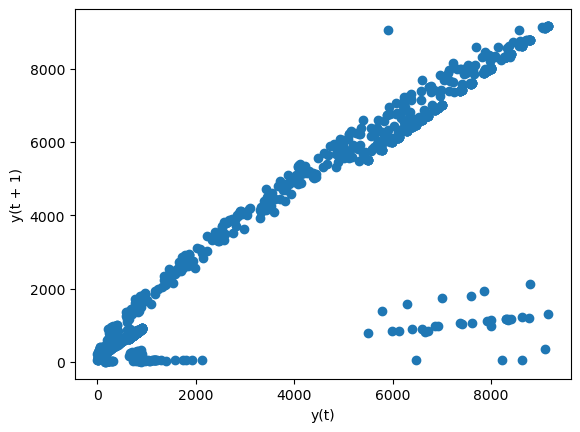

In [90]:
import pandas as pd
from pandas import read_csv, DataFrame, concat

from matplotlib import pyplot
from pandas.plotting import lag_plot
# Charger le fichier CSV avec date_format
series = pd.read_csv('Daily_Yield_Transformed.csv',  
                     header=0,  
                     index_col=0,  
                     parse_dates=True)
series.index = pd.to_datetime(series.index) # Ajustez selon le format de votre fichier

# Convertir les températures en type numérique
Daily_Yield = DataFrame(series.values)
Daily_Yield= Daily_Yield.apply(pd.to_numeric, errors='coerce')

lag_plot(Daily_Yield)


In [91]:
# correlation of lag=1
from pandas import DataFrame
from pandas import concat


values = DataFrame(series['daily_yield'].values)
dataframe = concat([daily_yield.shift(1),daily_yield], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

            t       t+1
t    1.000000  0.840141
t+1  0.840141  1.000000


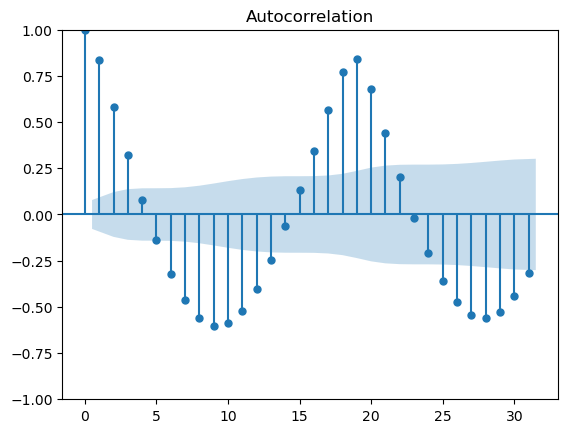

In [92]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(daily_yield, lags=31)
pyplot.show()



 ## persistence model 

Test RMSE: 157.983


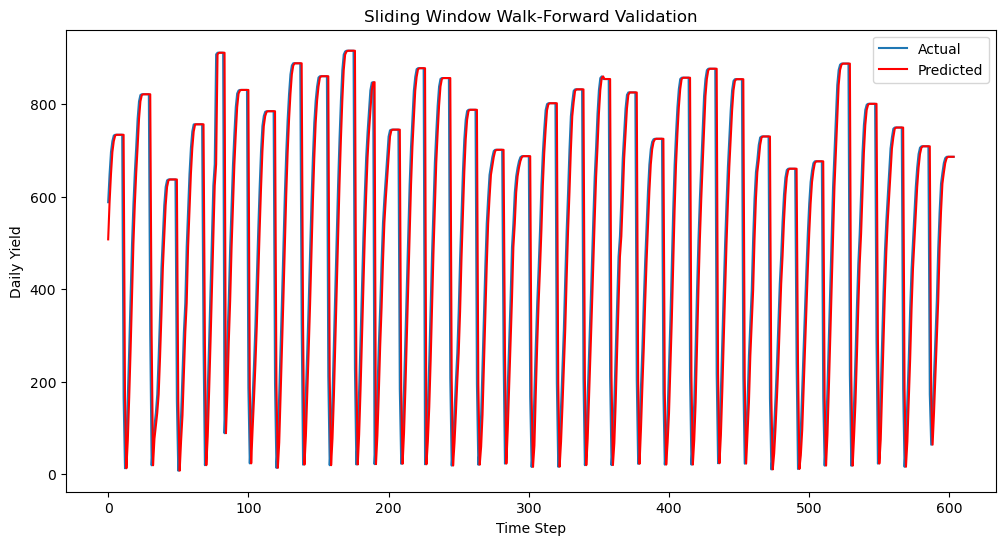

In [94]:
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Create lagged dataset
dataframe = concat([daily_yield.shift(1), daily_yield], axis=1)
dataframe.columns = ['t', 't+1']

# Drop rows with NaN values (due to shifting)
dataframe.dropna(inplace=True)

# Extract values
values = dataframe.values

# Define sliding window size
window_size = 24  # Example: Use the last 30 observations for training

# Initialize lists for predictions and actual values
predictions = []
actuals = []

# Sliding window walk-forward validation
for i in range(window_size, len(values)):
    # Train on the sliding window
    train_X, train_y = values[i - window_size:i, 0], values[i - window_size:i, 1]
    
    # Test on the next observation
    test_X, test_y = values[i, 0], values[i, 1]
    
    # Persistence model prediction
    yhat = test_X  # Predict the current value as the next value
    predictions.append(yhat)
    actuals.append(test_y)

# Calculate RMSE
rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Sliding Window Walk-Forward Validation')
plt.xlabel('Time Step')
plt.ylabel('Daily Yield')
plt.legend()
plt.show()

## Autoregressive model :

An autoregression model is a linear regression model that uses lagged variables as input variables. We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. Alternately, the Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

Test RMSE: 153.304


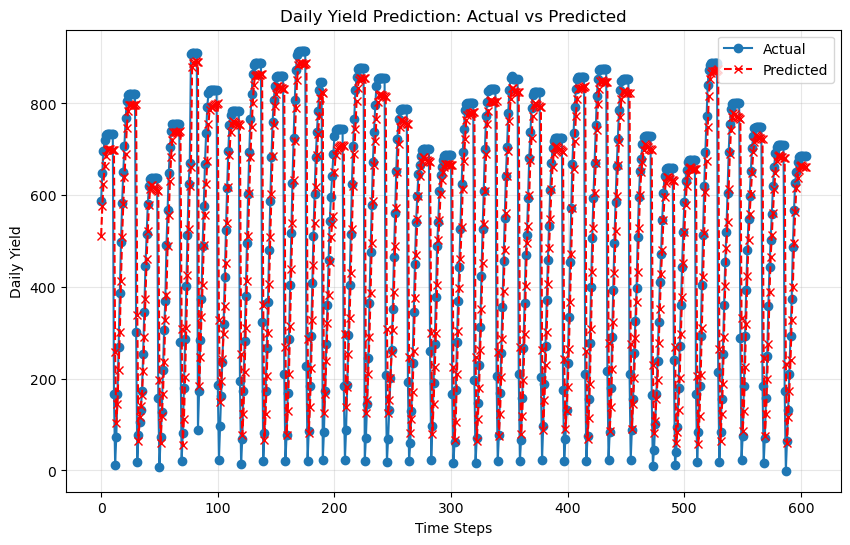

In [96]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv

# Load the CSV file with date parsing
series = read_csv(
    'Daily_Yield_Transformed.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    date_format="%d-%m-%Y %H:%M"  # Adjust this format if needed
)

# Convert the 'daily_yield' column to numeric and drop NaN values
daily_yield = pd.to_numeric(series['daily_yield'], errors='coerce')
daily_yield.dropna(inplace=True)

# Create lagged dataset
dataframe = pd.concat([daily_yield.shift(1), daily_yield], axis=1)
dataframe.columns = ['t', 't+1']

# Drop rows with NaN values (due to shifting)
dataframe.dropna(inplace=True)

# Extract values
values = dataframe.values

# Define sliding window size
window_size = 24  # Example: Use the last 30 observations for training

# Initialize lists for predictions and actual values
predictions = []
actuals = []

# Walk-forward validation with sliding window
for i in range(window_size, len(values)):
    # Train on the sliding window
    train_X, train_y = values[i - window_size:i, 0], values[i - window_size:i, 1]
    
    # Test on the next observation
    test_X, test_y = values[i, 0], values[i, 1]
    
    # Fit AutoReg model
    model = AutoReg(train_y, lags=1)  # Using 1 lag for basic AR(1) model
    model_fit = model.fit()
    
    # Predict the next value
    yhat = model_fit.predict(start=len(train_y), end=len(train_y), dynamic=False)[0]
    predictions.append(yhat)
    actuals.append(test_y)

# Calculate RMSE
rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot results
pyplot.figure(figsize=(10, 6))
pyplot.plot(actuals, label='Actual', marker='o')
pyplot.plot(predictions, color='red', label='Predicted', linestyle='--', marker='x')
pyplot.legend()
pyplot.title('Daily Yield Prediction: Actual vs Predicted')
pyplot.xlabel('Time Steps')
pyplot.ylabel('Daily Yield')
pyplot.grid(True, alpha=0.3)
pyplot.show()

Test RMSE: 1121.016


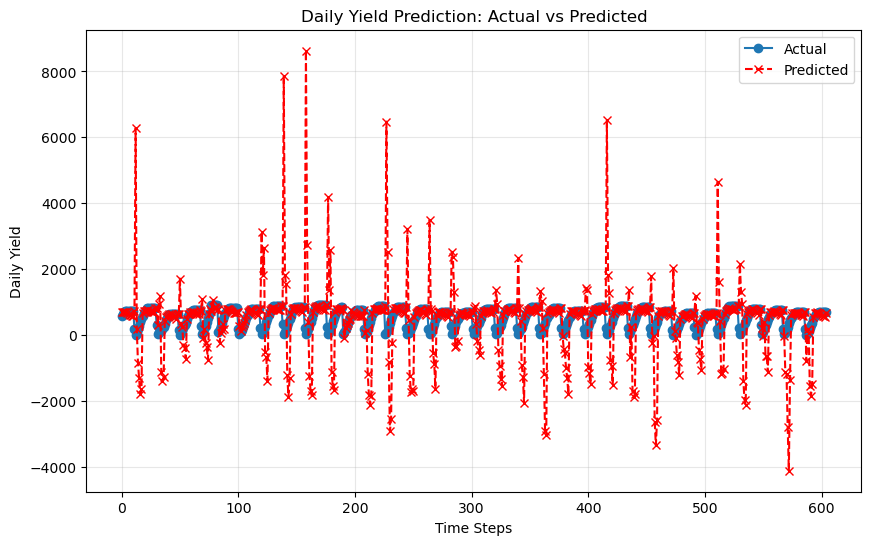

In [97]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv

# Load the CSV file with date parsing
series = read_csv(
    'Daily_Yield_Transformed.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    date_format="%d-%m-%Y %H:%M"  # Adjust this format if needed
)

# Convert the 'daily_yield' column to numeric and drop NaN values
daily_yield = pd.to_numeric(series['daily_yield'], errors='coerce')
daily_yield.dropna(inplace=True)

# Create lagged dataset
dataframe = pd.concat([daily_yield.shift(1), daily_yield], axis=1)
dataframe.columns = ['t', 't+1']

# Drop rows with NaN values (due to shifting)
dataframe.dropna(inplace=True)

# Extract values
values = dataframe.values

# Define sliding window size
window_size = 24 # Example: Use the last 30 observations for training

# Initialize lists for predictions and actual values
predictions = []
actuals = []

# Walk-forward validation with sliding window
for i in range(window_size, len(values)):
    # Train on the sliding window
    train_X, train_y = values[i - window_size:i, 0], values[i - window_size:i, 1]
    
    # Test on the next observation
    test_X, test_y = values[i, 0], values[i, 1]
    
    # Fit AutoReg model
    model = AutoReg(train_y, lags=7)  # Using 1 lag for basic AR(1) model
    model_fit = model.fit()
    
    # Predict the next value
    yhat = model_fit.predict(start=len(train_y), end=len(train_y), dynamic=False)[0]
    predictions.append(yhat)
    actuals.append(test_y)

# Calculate RMSE
rmse = sqrt(mean_squared_error(actuals, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot results
pyplot.figure(figsize=(10, 6))
pyplot.plot(actuals, label='Actual', marker='o')
pyplot.plot(predictions, color='red', label='Predicted', linestyle='--', marker='x')
pyplot.legend()
pyplot.title('Daily Yield Prediction: Actual vs Predicted')
pyplot.xlabel('Time Steps')
pyplot.ylabel('Daily Yield')
pyplot.grid(True, alpha=0.3)
pyplot.show()

Lag 1: RMSE = 153.304
Lag 2: RMSE = 141.738
Lag 3: RMSE = 141.423
Lag 4: RMSE = 139.174
Lag 5: RMSE = 138.357
Lag 6: RMSE = 309.140
Lag 7: RMSE = 1121.016
Lag 8: RMSE = 2089.892
Lag 9: RMSE = 3203.916
Lag 10: RMSE = 18748.823

Optimal Lag: 5
Minimum RMSE: 138.357


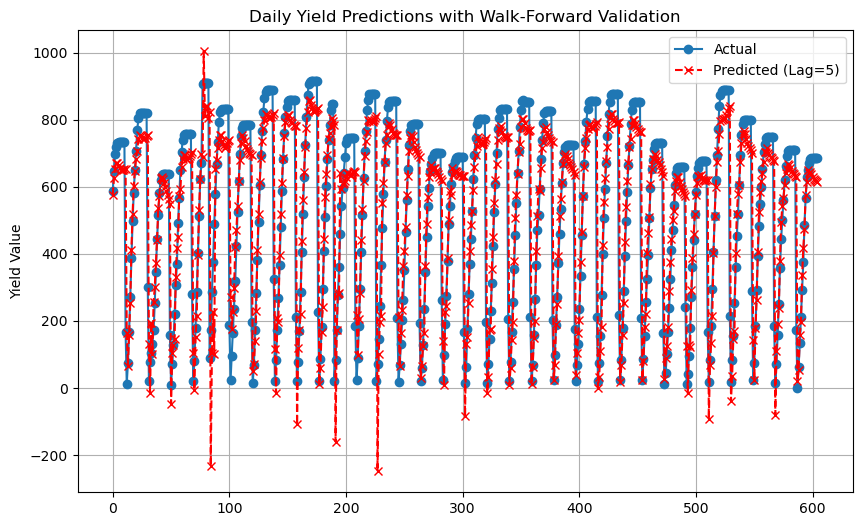

In [98]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
import numpy as np

# Load your data
series = read_csv(
    'Daily_Yield_Transformed.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    date_format="%d-%m-%Y %H:%M"
)
yield_data = pd.to_numeric(series['daily_yield'], errors='coerce')
yield_data.dropna(inplace=True)

# Create lagged dataset
dataframe = pd.concat([yield_data.shift(1), yield_data], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.dropna(inplace=True)

# Extract values
values = dataframe.values

# Define sliding window size
window_size = 24 # Example: Use the last 30 observations for training

# Initialize lists for predictions and actual values
predictions = []
actuals = []

# Find optimal lag with safety checks
best_lag = 1
best_rmse = float('inf')
max_possible_lags = min(10, len(values) // 2)  # Reduced from 100 to 30 for safety

results = []
for lag in range(1, max_possible_lags + 1):
    try:
        # Initialize lists for this lag's predictions and actuals
        lag_predictions = []
        lag_actuals = []
        
        # Walk-forward validation with sliding window
        for i in range(window_size, len(values)):
            # Train on the sliding window
            train_X, train_y = values[i - window_size:i, 0], values[i - window_size:i, 1]
            
            # Test on the next observation
            test_X, test_y = values[i, 0], values[i, 1]
            
            # Check if lag is valid for this training set
            if lag >= len(train_y):
                print(f"Skipped lag {lag}: Not enough data points in the training set.")
                continue
            
            # Add small noise to prevent zero variance
            noisy_train = train_y + np.random.normal(0, 1e-6, len(train_y))
            
            # Fit AutoReg model
            model = AutoReg(noisy_train, lags=lag, trend='c')  # Added constant trend
            model_fit = model.fit()
            
            # Check if model is valid
            if not np.isfinite(model_fit.params).all():
                print(f"Invalid coefficients at lag {lag}")
                continue
                
            # Predict the next value
            yhat = model_fit.predict(start=len(train_y), end=len(train_y), dynamic=False)[0]
            lag_predictions.append(yhat)
            lag_actuals.append(test_y)
        
        # Calculate RMSE for this lag
        rmse = sqrt(mean_squared_error(lag_actuals, lag_predictions))
        results.append((lag, rmse))
        
        print(f"Lag {lag}: RMSE = {rmse:.3f}")
        
        # Update best lag and RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_lag = lag
            predictions = lag_predictions
            actuals = lag_actuals
            
    except Exception as e:
        print(f"Skipped lag {lag}: {str(e)}")
        continue

# Handle case where no model succeeded
if len(predictions) == 0:
    print("Warning: No valid models found. Using persistence model as fallback.")
    predictions = [values[i, 0] for i in range(window_size, len(values))]  # Persistence forecast
    actuals = [values[i, 1] for i in range(window_size, len(values))]
    best_rmse = sqrt(mean_squared_error(actuals, predictions))
    best_lag = 1

print(f"\nOptimal Lag: {best_lag}")
print(f"Minimum RMSE: {best_rmse:.3f}")

# Plot results
pyplot.figure(figsize=(10, 6))
pyplot.plot(actuals, label='Actual', marker='o')
if predictions is not None:
    pyplot.plot(predictions, label=f'Predicted (Lag={best_lag})', 
                color='red', linestyle='--', marker='x')
pyplot.title('Daily Yield Predictions with Walk-Forward Validation')
pyplot.ylabel('Yield Value')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

The best lag to choose for the AR is **5**

## Moving Average Models for Forecasting

Test RMSE: 157.969
First few residuals:
   Residuals
0  80.309183
1  60.569224
2  47.761468
3  23.483955
4  12.097570


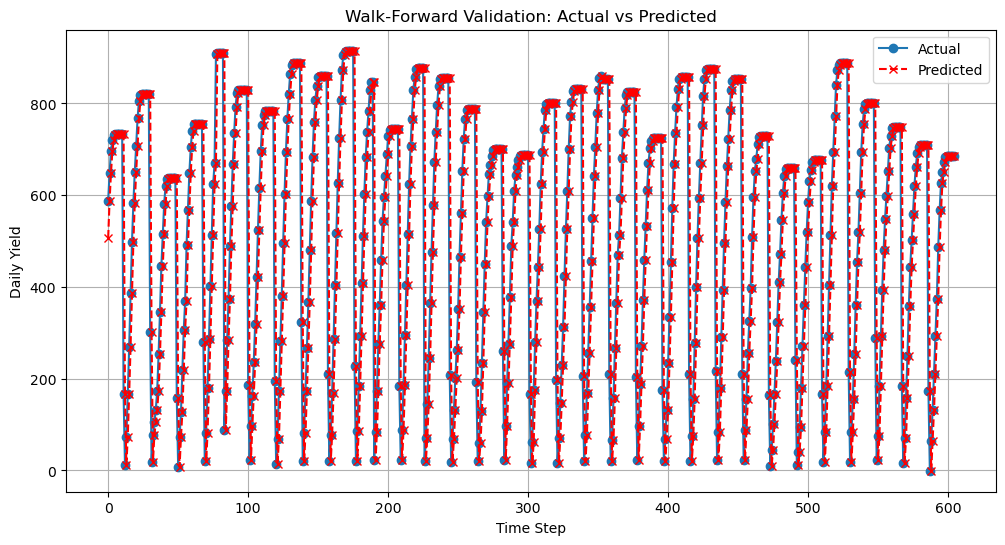

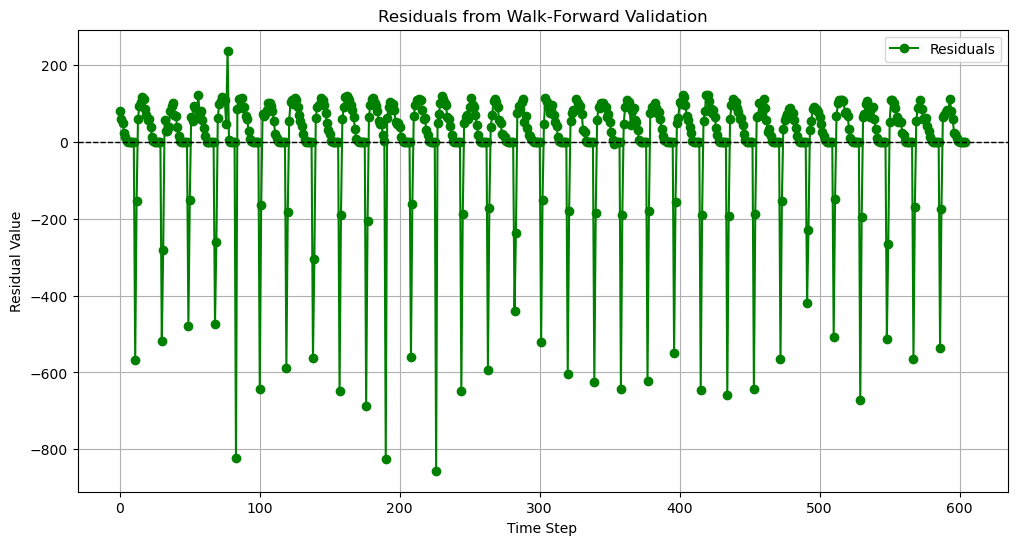

In [101]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load data
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)
series = series.squeeze()  # Convert single-column DataFrame to Series

# Create lagged dataset
values = DataFrame(series['daily_yield'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Drop rows with NaN values (due to shifting)
dataframe.dropna(inplace=True)

# Extract values
X = dataframe.values

# Initialize lists for predictions, actuals, and residuals
predictions = []
actuals = []
residuals = []

# Define the sliding window size
window_size = 24  # Example: Use the last 30 observations for training

# Walk-forward validation
for i in range(window_size, len(X)):
    # Train on the sliding window
    train_X, train_y = X[i - window_size:i, 0], X[i - window_size:i, 1]
    
    # Test on the next observation
    test_X, test_y = X[i, 0], X[i, 1]
    
    # Persistence model prediction
    yhat = test_X  # Predict the current value as the next value
    predictions.append(yhat)
    actuals.append(test_y)
    
    # Calculate residual
    residual = test_y - yhat
    residuals.append(residual)

# Calculate RMSE for persistence model
rmse = sqrt(mean_squared_error(actuals, predictions))
print(f'Test RMSE: {rmse:.3f}')

# Convert residuals to a DataFrame
residuals_df = DataFrame(residuals, columns=['Residuals'])
print("First few residuals:")
print(residuals_df.head())

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Walk-Forward Validation: Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Daily Yield')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals_df, label='Residuals', color='green', marker='o')
plt.title('Residuals from Walk-Forward Validation')
plt.xlabel('Time Step')
plt.ylabel('Residual Value')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero line for reference
plt.legend()
plt.grid(True)
plt.show()

In [102]:
from statsmodels.stats.diagnostic import acorr_ljungbox  # Import Ljung-Box test
# Check if residuals are white noise using Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10])  # Test for autocorrelation up to lag 10
print("\nLjung-Box Test Results:")
print(lb_test)

# Interpret the Ljung-Box test results
p_value = lb_test.iloc[0]['lb_pvalue']  # p-value for the test
if p_value > 0.05:
    print("\nThe residuals are white noise (fail to reject the null hypothesis).")
else:
    print("\nThe residuals are NOT white noise (reject the null hypothesis).")


Ljung-Box Test Results:
      lb_stat     lb_pvalue
10  148.38737  7.999728e-27

The residuals are NOT white noise (reject the null hypothesis).


In [103]:
import numpy as np
from scipy.stats import shapiro

# Ensure residuals is converted to a Pandas DataFrame or NumPy array
if isinstance(residuals, list):  # Check if residuals is a list
    residuals = np.array(residuals)  # Convert to NumPy array for numerical operations

# 1. Mean of Zero
residual_mean = np.mean(residuals)  # Calculate mean of residuals
print(f"Mean of Residuals: {residual_mean:.4f}")
if abs(residual_mean) < 0.01:  # Close to zero
    print("✅ The mean of residuals is close to zero.")
else:
    print("❌ The mean of residuals is NOT close to zero.")

# 2. Gaussian (Normal) Distribution
shapiro_test = shapiro(residuals)  # Perform Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro_test.statistic, shapiro_test.pvalue
print(f"\nShapiro-Wilk Test for Normality: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("✅ The residuals follow a normal distribution.")
else:
    print("❌ The residuals do NOT follow a normal distribution.")

Mean of Residuals: 0.2948
❌ The mean of residuals is NOT close to zero.

Shapiro-Wilk Test for Normality: Statistic=0.5650, p-value=0.0000
❌ The residuals do NOT follow a normal distribution.


In [104]:
# 3. Constant Variance (Homoscedasticity)
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X = sm.add_constant(predictions)  # Add a constant term to predictions
bp_test = het_breuschpagan(residuals, X)

# Extract p-value
p_value = bp_test[1]  # The second element is the p-value

print(f"Breusch-Pagan p-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("✅ Homoscedasticity confirmed (constant variance).")
else:
    print("❌ Heteroscedasticity detected (variance is not constant).")


Breusch-Pagan p-value: 0.0001
❌ Heteroscedasticity detected (variance is not constant).


In [105]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test autocorrelation for lags 1-10
lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
print(lb_test)

if (lb_test['lb_pvalue'] > 0.05).all():
    print("✅ No autocorrelation ()")
else:
    print(f"❌ Autocorrelation detected at lags: {lb_test[lb_test['lb_pvalue'] < 0.05].index.tolist()}")

       lb_stat     lb_pvalue
1    57.790867  2.915200e-14
2    57.804923  2.804274e-13
3    59.128826  9.022881e-13
4    63.230875  6.067547e-13
5    69.668344  1.201287e-13
6    80.929101  2.296389e-15
7    93.066278  2.898626e-17
8   109.847950  4.091523e-20
9   130.327718  1.015464e-23
10  148.387370  7.999728e-27
❌ Autocorrelation detected at lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


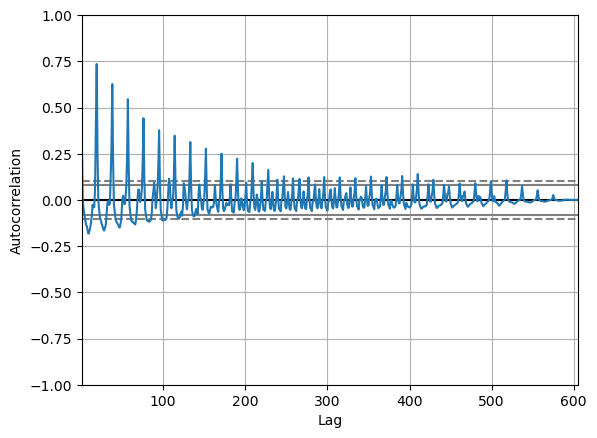

In [106]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)
pyplot.show()

White noise requires all four conditions:

Mean zero,

Constant variance,

Normality (optional, but often assumed),

No autocorrelation (independence over time).

The residuals pass all conditions  means that the residaul is not WHITE NOISE 

Time Step 44: Residual RMSE: 186.545
Time Step 45: Residual RMSE: 179.317
Time Step 46: Residual RMSE: 172.003
Time Step 47: Residual RMSE: 165.301
Time Step 48: Residual RMSE: 159.295
Time Step 49: Residual RMSE: 153.897
Time Step 50: Residual RMSE: 149.012
Time Step 51: Residual RMSE: 144.563
Time Step 52: Residual RMSE: 140.492
Time Step 53: Residual RMSE: 136.747
Time Step 54: Residual RMSE: 175.398
Time Step 55: Residual RMSE: 171.481
Time Step 56: Residual RMSE: 168.946
Time Step 57: Residual RMSE: 165.252
Time Step 58: Residual RMSE: 161.876
Time Step 59: Residual RMSE: 158.610
Time Step 60: Residual RMSE: 112.892
Time Step 61: Residual RMSE: 110.495
Time Step 62: Residual RMSE: 111.110
Time Step 63: Residual RMSE: 109.467
Time Step 64: Residual RMSE: 109.449
Time Step 65: Residual RMSE: 109.226
Time Step 66: Residual RMSE: 108.673
Time Step 67: Residual RMSE: 108.388
Time Step 68: Residual RMSE: 108.121
Time Step 69: Residual RMSE: 107.937
Time Step 70: Residual RMSE: 107.538
T

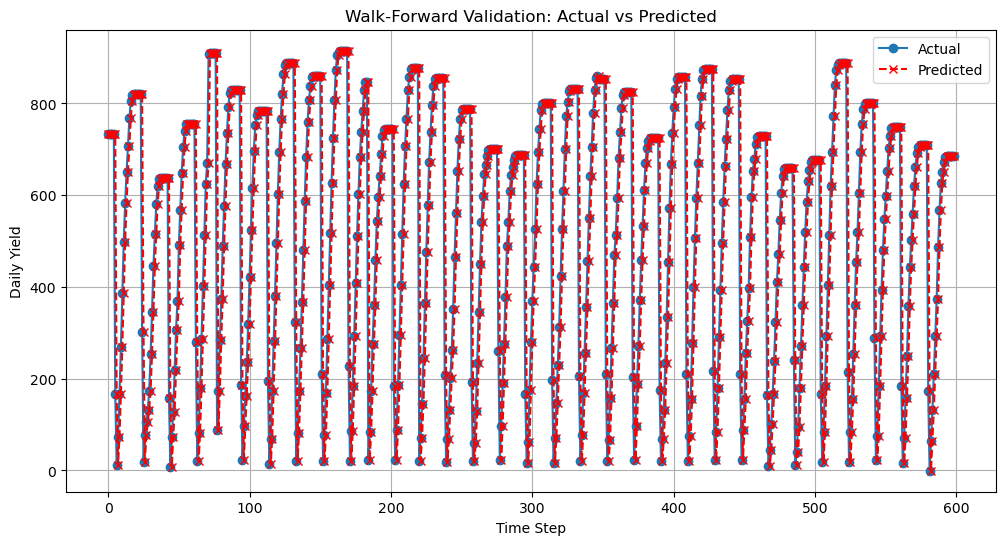

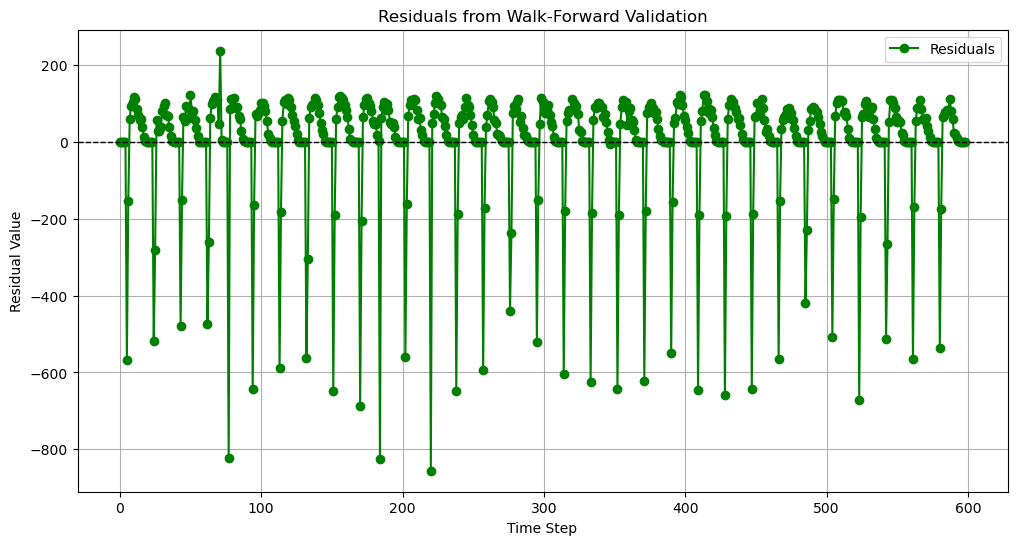

In [108]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg  # Use AutoReg instead of AR
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load data
series = read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)
series = series.squeeze()  # Convert single-column DataFrame to Series

# Create lagged dataset
values = DataFrame(series['daily_yield'].values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Drop rows with NaN values (due to shifting)
dataframe.dropna(inplace=True)

# Extract values
X = dataframe.values

# Define sliding window size
window_size = 30  # Example: Use the last 30 observations for training

# Initialize lists for predictions, actuals, and residuals
predictions = []
actuals = []
residuals = []

# Walk-forward validation
for i in range(window_size, len(X)):
    # Train on the sliding window
    train_X, train_y = X[i - window_size:i, 0], X[i - window_size:i, 1]
    
    # Test on the next observation
    test_X, test_y = X[i, 0], X[i, 1]
    
    # Persistence model prediction
    yhat = test_X  # Predict the current value as the next value
    predictions.append(yhat)
    actuals.append(test_y)
    
    # Calculate residual
    residual = test_y - yhat
    residuals.append(residual)
    
    # Model the residuals using AutoReg
    if len(residuals) > 14:  # Ensure enough residuals for AutoReg
        residual_series = residuals[-window_size:]  # Use recent residuals
        model = AutoReg(residual_series, lags=5)  # Use AutoReg with 5 lags
        model_fit = model.fit()
        
        # Get model parameters
        window = model_fit.ar_lags
        coef = model_fit.params
        
        # Make predictions for residuals
        residual_pred = model_fit.predict(start=window[-1], end=len(residual_series) - 1)
        
        # Evaluate the AR model on residuals
        residual_mse = mean_squared_error(residual_series[window[-1]:], residual_pred)
        residual_rmse = sqrt(residual_mse)
        print(f"Time Step {i}: Residual RMSE: {residual_rmse:.3f}")

# Calculate overall RMSE for persistence model
rmse = sqrt(mean_squared_error(actuals, predictions))
print(f'\nOverall Test RMSE: {rmse:.3f}')

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual', marker='o')
plt.plot(predictions, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Walk-Forward Validation: Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Daily Yield')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='green', marker='o')
plt.title('Residuals from Walk-Forward Validation')
plt.xlabel('Time Step')
plt.ylabel('Residual Value')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero line for reference
plt.legend()
plt.grid(True)
plt.show()

Next, the actual residual error for the time series is plotted compared to the predicted residual error.

Walk-Forward RMSE: 124.404


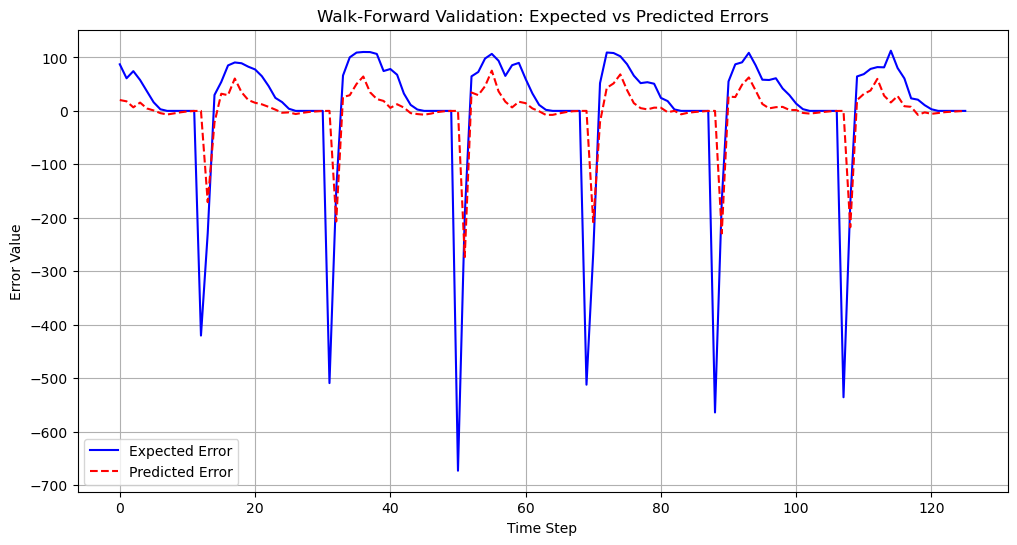

In [110]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt



# Fix target split (assuming your X = lagged features)
train_size = int(len(X) * 0.8)

train_y = X[window_size:train_size, 1]
test_y = X[train_size:, 1]

# Now this will work:
train_resid = residuals[:-len(test_y)]

# Walk forward over time steps in test
max_lag = max(window)  # Use the maximum lag value
# exclude test residuals
history = train_resid[-max_lag:] # Convert to Python list# Initialize history with the last `max_lag` residuals
predictions = list()
expected_error = list()


# Define test_X as the feature values for the test set
test_X = X[train_size:, 0]  # Features for the test set

# Ensure test_y is iterable
if len(test_y) == 0:
    raise ValueError("test_y is empty. Check the train-test split logic.")

# Walk forward over time steps in test
for t in range(len(test_y)):
    yhat = test_X[t]  # Predicted value from the persistence model
    error = test_y[t] - yhat  # Compute the residual error
    expected_error.append(error)

    if len(history) < max_lag:
        predictions.append(0)  # Or skip with: continue
        history.append(error)
        continue

    lag = history[-max_lag:]
    pred_error = coef[0]  # Intercept term
    for d in range(max_lag):
        pred_error += coef[d + 1] * lag[max_lag - d - 1]

    predictions.append(pred_error)
    history.append(error)
    history.pop(0)  # Maintain a rolling window of residuals


# Ensure test_y is iterable

# Evaluate the walk-forward predictions
walk_forward_mse = mean_squared_error(expected_error, predictions)
walk_forward_rmse = sqrt(walk_forward_mse)
print('Walk-Forward RMSE: %.3f' % walk_forward_rmse)

# Plot results
pyplot.figure(figsize=(12, 6))
pyplot.plot(expected_error, label='Expected Error', color='blue')
pyplot.plot(predictions, label='Predicted Error', color='red', linestyle='--')
pyplot.title('Walk-Forward Validation: Expected vs Predicted Errors')
pyplot.xlabel('Time Step')
pyplot.ylabel('Error Value')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

now that we know how to model residual error, next we will look at how we can go about correcting forecasts and improving model skill.

AutoReg Coefficients: [ 0.68695028  0.27057569 -0.0842538  -0.0191157  -0.04948271 -0.04403942
 -0.08183251 -0.0881553 ]
Corrected Prediction RMSE: 136.520


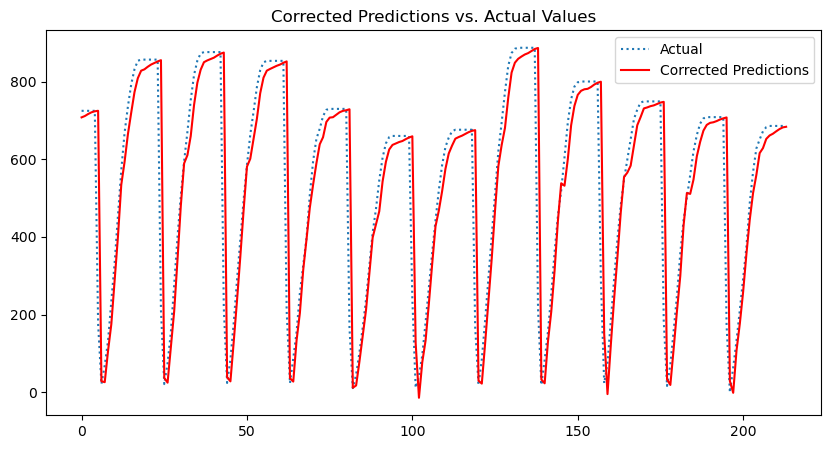

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data
series = pd.read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)
series = series.squeeze()  # Convert single-column DataFrame to Series

# Create lagged dataset
values = pd.DataFrame(series['daily_yield'].values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# Drop NaN values
dataframe.dropna(inplace=True)

# Split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

# **Step 1: Persistence Model (Baseline)**
train_pred = train_X.copy()

# Calculate residuals
train_resid = train_y - train_pred

# **Step 2: Fit an AutoRegressive Model on Residuals**
lag = 7  # Use 15 lags
residual_model = AutoReg(train_resid, lags=lag).fit()

# Get model coefficients
coef = residual_model.params
print(f'AutoReg Coefficients: {coef}')

# **Step 3: Walk Forward Over Test Set**
history = train_resid[-lag:].tolist()  # Initialize history with last `lag` residuals
corrected_predictions = []

for t in range(len(test_y)):
    # Step 3.1: Baseline persistence prediction
    yhat = test_X[t]
    
    # Step 3.2: Predict residual using AR model
    lagged_residuals = history[-lag:]  # Use last `lag` residuals
    predicted_residual = coef[0]  # Intercept

    for i in range(lag):
        predicted_residual += coef[i + 1] * lagged_residuals[-(i + 1)]

    # Step 3.3: Correct the prediction
    corrected_yhat = yhat + predicted_residual
    corrected_predictions.append(corrected_yhat)

    # Step 3.4: Update history with actual residual
    actual_residual = test_y[t] - yhat
    history.append(actual_residual)
    history.pop(0)  # Keep only `lag` recent residuals

# **Step 4: Evaluate Model Performance**
mse = mean_squared_error(test_y, corrected_predictions)
rmse = sqrt(mse)
print(f'Corrected Prediction RMSE: {rmse:.3f}')

# **Step 5: Visualization**
plt.figure(figsize=(10, 5))
plt.plot(test_y, label="Actual", linestyle="dotted")
plt.plot(corrected_predictions, label="Corrected Predictions", color="red")
plt.legend()
plt.title("Corrected Predictions vs. Actual Values")
plt.show()


## ARIMA Model 
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class
of model that captures a suite of different standard temporal structures in time series data.

My data is already stationnary , but we can  check the plot again : 

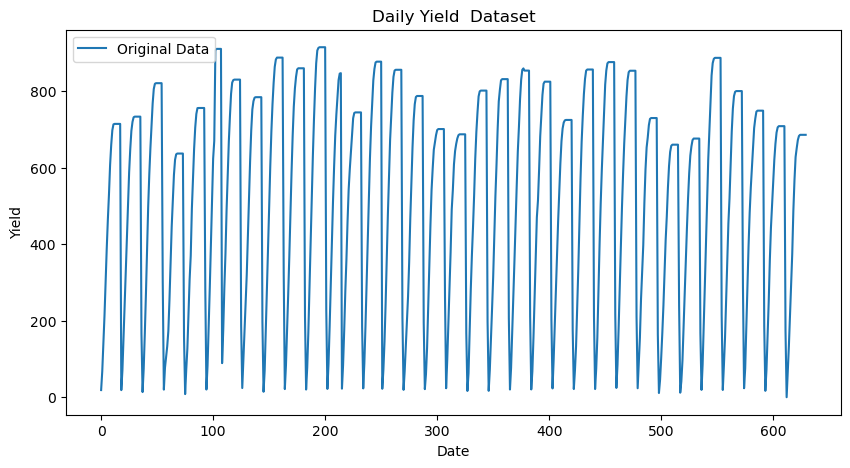

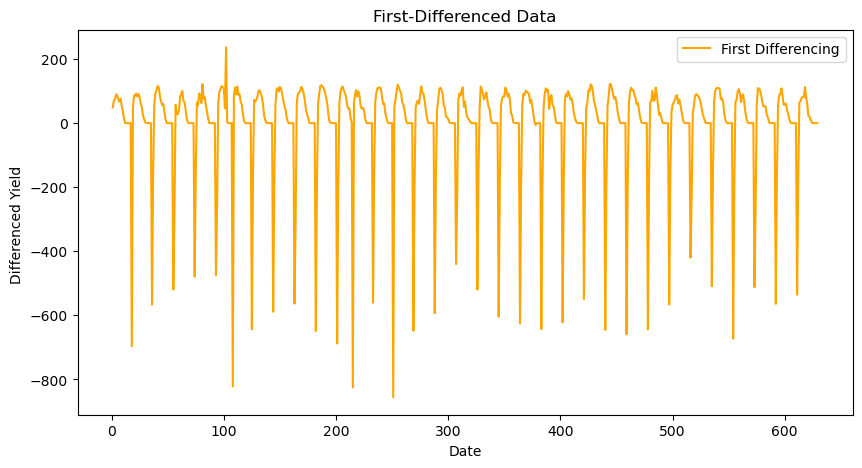


Stationarity Check for First-Differenced Data:

ADF Statistic (First-Differenced): -9.930622089821746
p-value (First-Differenced): 2.829326758819433e-17
Result: First-Differenced data is stationary (reject the null hypothesis).


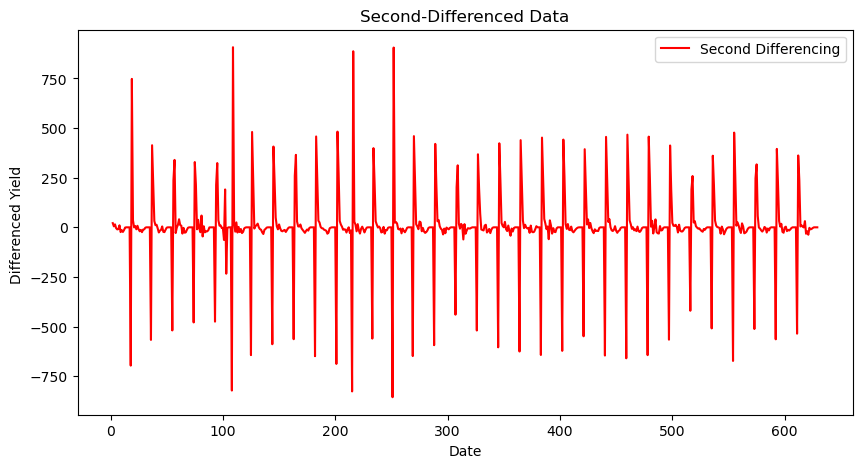


Stationarity Check for Second-Differenced Data:

ADF Statistic (Second-Differenced): -17.56386503176514
p-value (Second-Differenced): 4.083620866846675e-30
Result: Second-Differenced data is stationary (reject the null hypothesis).


In [115]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller 

# Load data
series = pd.read_csv('Daily_Yield_Transformed.csv', header=0, index_col=0, parse_dates=True)
series = series.squeeze()  # Convert single-column DataFrame to Series

values = pd.DataFrame(series['daily_yield'].values)
# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(values, label="Original Data")
plt.title("Daily Yield  Dataset")
plt.xlabel("Date")
plt.ylabel("Yield")
plt.legend()
plt.show()

# **Step 1: Apply First-Degree Differencing**
diff1 = values.diff().dropna()  # First differencing

# Plot first-differenced data
plt.figure(figsize=(10, 5))
plt.plot(diff1, label="First Differencing", color="orange")
plt.title("First-Differenced Data")
plt.xlabel("Date")
plt.ylabel("Differenced Yield ")
plt.legend()
plt.show()

# **Step 2: Check Stationarity of First-Differenced Data**
def check_stationarity(data, title):
    result = adfuller(data)
    print(f'\nADF Statistic ({title}): {result[0]}')
    print(f'p-value ({title}): {result[1]}')
    if result[1] <= 0.05:
        print(f"Result: {title} data is stationary (reject the null hypothesis).")
    else:
        print(f"Result: {title} data is NOT stationary (fail to reject the null hypothesis).")

print("\nStationarity Check for First-Differenced Data:")
check_stationarity(diff1, "First-Differenced")

# **Step 3: Apply Second-Degree Differencing**
diff2 = diff1.diff().dropna()  # Second differencing

# Plot second-differenced data
plt.figure(figsize=(10, 5))
plt.plot(diff2, label="Second Differencing", color="red")
plt.title("Second-Differenced Data")
plt.xlabel("Date")
plt.ylabel("Differenced Yield ")
plt.legend()
plt.show()

# **Step 4: Check Stationarity of Second-Differenced Data**
print("\nStationarity Check for Second-Differenced Data:")
check_stationarity(diff2, "Second-Differenced")

let’s start off with something simple. We will fit an ARIMA model to the entire dataset and review the residual errors. First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

                               SARIMAX Results                                
Dep. Variable:            daily_yield   No. Observations:                  810
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4006.119
Date:                Mon, 14 Apr 2025   AIC                           8024.238
Time:                        15:24:55   BIC                           8052.413
Sample:                    05-15-2020   HQIC                          8035.056
                         - 06-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2489      0.489      0.509      0.611      -0.709       1.207
ar.L2          0.1366      0.641      0.213      0.831      -1.120       1.393
ar.L3          0.0819      0.591      0.139      0.8

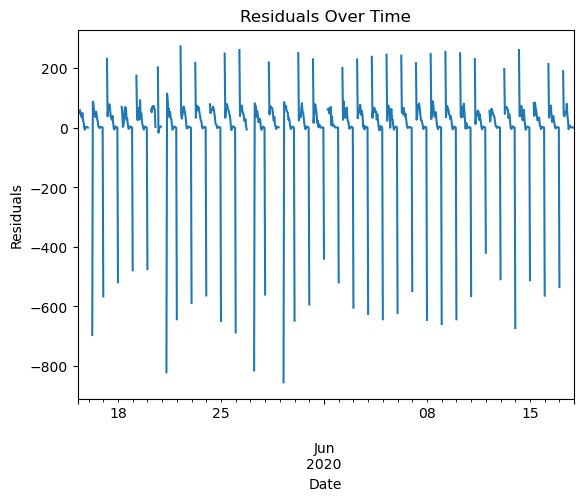

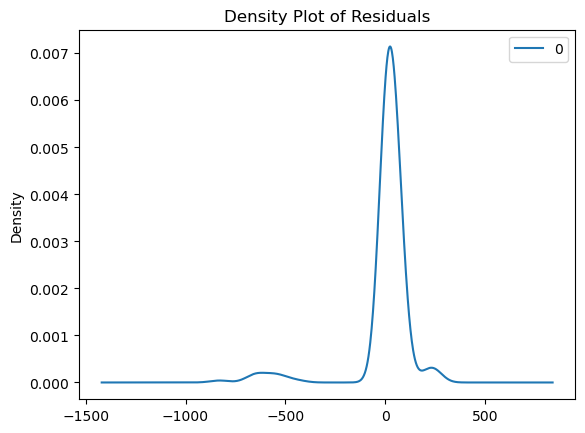

                0
count  630.000000
mean     1.951460
std    151.644275
min   -855.307023
25%      1.213787
50%     22.137444
75%     52.395079
max    273.350894


In [117]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

df = pd.read_csv("Daily_Yield_Transformed.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df = df.asfreq('h')  # Ensure time frequency is set (hourly)

series = df["daily_yield"]

# Fit ARIMA model
model = ARIMA(series, order=(5, 1, 0))  # ARIMA(p,d,q) - adjust if needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Residuals
residuals = pd.DataFrame(model_fit.resid)

# Plot residuals over time
residuals.plot(title="Residuals Over Time", ylabel="Residuals", legend=False)
plt.xlabel("Date")
plt.show()

# Density plot
residuals.plot(kind='kde', title="Density Plot of Residuals")
plt.show()

# Summary statistics
print(residuals.describe())


Above we used the entire dataset for time series analysis, ideally we would perform this analysis on just the training dataset when developing a predictive model. Next, let’s look at how we can use the ARIMA model to make forecasts. and differnt parameters to see the different results :

Predicted=716.273, Expected=724.720
Predicted=719.239, Expected=724.720
Predicted=721.760, Expected=724.720
Predicted=723.442, Expected=724.720
Predicted=724.308, Expected=724.720
Predicted=724.651, Expected=724.720
Predicted=724.720, Expected=176.060
Predicted=17.588, Expected=20.840
Predicted=17.242, Expected=68.961
Predicted=101.292, Expected=131.898
Predicted=169.687, Expected=234.962
Predicted=301.789, Expected=334.084
Predicted=362.321, Expected=455.203
Predicted=475.424, Expected=571.458
Predicted=586.228, Expected=668.095
Predicted=674.974, Expected=735.405
Predicted=734.864, Expected=792.613
Predicted=790.455, Expected=831.961
Predicted=826.881, Expected=853.692
Predicted=847.423, Expected=856.643
Predicted=848.742, Expected=856.643
Predicted=850.854, Expected=856.643
Predicted=853.154, Expected=856.643
Predicted=855.092, Expected=856.643
Predicted=856.448, Expected=856.643
Predicted=856.643, Expected=210.958
Predicted=22.058, Expected=20.840
Predicted=13.676, Expected=74.444


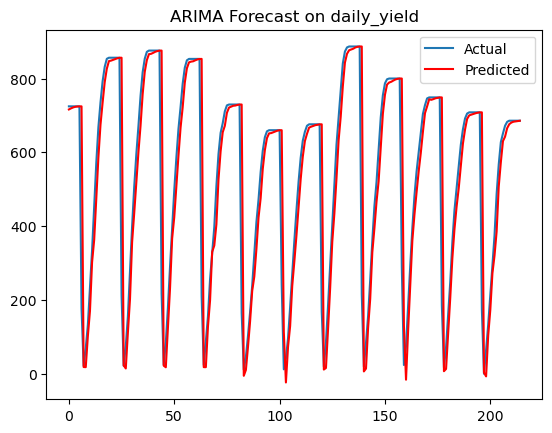

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv("Daily_Yield_Transformed.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)


# Suppose this is your transformed series
series = df['daily_yield']

# Drop NaN values (important!)
series = series.dropna()

# Split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = list(train)
predictions = []

# Walk-forward validation (slower method but accurate)
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')

# Convert to NumPy arrays to handle NaNs easily
predictions = np.array(predictions)
test = np.array(test)

# Drop potential NaNs (just in case)
mask = ~np.isnan(test) & ~np.isnan(predictions)
test_clean = test[mask]
predictions_clean = predictions[mask]

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test_clean, predictions_clean))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecasts vs actual outcomes
plt.plot(test_clean, label="Actual")
plt.plot(predictions_clean, color='red', label="Predicted")
plt.legend()
plt.title("ARIMA Forecast on daily_yield")
plt.show()


Predicted=695.010, Expected=724.720
Predicted=695.976, Expected=724.720
Predicted=696.073, Expected=724.720
Predicted=696.169, Expected=724.720
Predicted=696.264, Expected=724.720
Predicted=696.359, Expected=724.720
Predicted=696.453, Expected=176.060
Predicted=238.029, Expected=20.840
Predicted=105.043, Expected=68.961
Predicted=144.956, Expected=131.898
Predicted=197.518, Expected=234.962
Predicted=284.065, Expected=334.084
Predicted=368.651, Expected=455.203
Predicted=470.003, Expected=571.458
Predicted=567.208, Expected=668.095
Predicted=648.036, Expected=735.405
Predicted=704.433, Expected=792.613
Predicted=752.483, Expected=831.961
Predicted=785.675, Expected=853.692
Predicted=804.156, Expected=856.643
Predicted=806.887, Expected=856.643
Predicted=807.137, Expected=856.643
Predicted=807.385, Expected=856.643
Predicted=807.630, Expected=856.643
Predicted=807.873, Expected=856.643
Predicted=808.114, Expected=210.958
Predicted=265.462, Expected=20.840
Predicted=104.885, Expected=74.

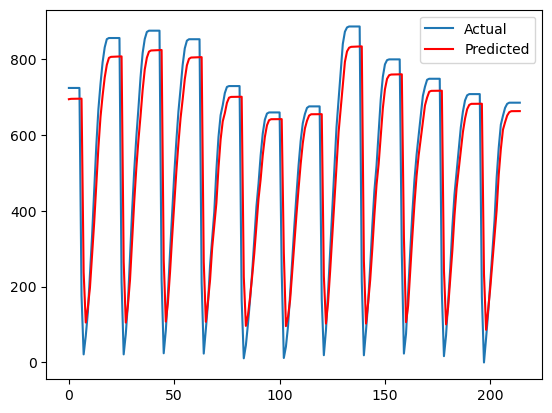

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv("Daily_Yield_Transformed.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Suppose this is your transformed series
series = df['daily_yield']
values = pd.DataFrame(series.values)  # Corrected: Removed redundant ['daily_yield'] indexing
X = series.values
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = list(train)
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Extract prediction
    predictions.append(yhat)
    
    obs = test[t]  # Actual observation
    history.append(obs)  # Update history
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')

# Evaluate forecasts
# Handle potential NaNs in predictions or test
test = np.array(test)  # Ensure test is a NumPy array
predictions = np.array(predictions)  # Ensure predictions is a NumPy array

# Remove rows with NaN values from both test and predictions
mask = ~np.isnan(test) & ~np.isnan(predictions)
test = test[mask]
predictions = predictions[mask]

# Compute RMSE only if valid data exists
if len(test) > 0 and len(predictions) > 0:
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'Test RMSE: {rmse:.3f}')
else:
    print("No valid data available to compute RMSE.")

# Plot forecasts vs actual outcomes
plt.plot(test, label="Actual")
plt.plot(predictions, color='red', label="Predicted")
plt.legend()
plt.show()

We can set some accurate parameters based on what we found earlier :

From the ACF and PACF plots:

ACF : Significant spikes at multiple lags → Suggests q = 2. anf from PACF : Significant spike at lag 1 → Suggests p = 1.

From the ADF test the series is stationnary so it needs no differencing   → d=0 

Predicted=689.564, Expected=724.720
Predicted=689.466, Expected=724.720
Predicted=689.510, Expected=724.720
Predicted=689.680, Expected=724.720
Predicted=689.783, Expected=724.720
Predicted=689.896, Expected=724.720
Predicted=690.011, Expected=176.060
Predicted=69.824, Expected=20.840
Predicted=93.976, Expected=68.961
Predicted=206.165, Expected=131.898
Predicted=228.665, Expected=234.962
Predicted=327.183, Expected=334.084
Predicted=406.229, Expected=455.203
Predicted=507.540, Expected=571.458
Predicted=599.409, Expected=668.095
Predicted=669.388, Expected=735.405
Predicted=714.667, Expected=792.613
Predicted=758.769, Expected=831.961
Predicted=785.463, Expected=853.692
Predicted=797.698, Expected=856.643
Predicted=795.216, Expected=856.643
Predicted=795.442, Expected=856.643
Predicted=796.181, Expected=856.643
Predicted=796.280, Expected=856.643
Predicted=796.590, Expected=856.643
Predicted=796.894, Expected=210.958
Predicted=63.595, Expected=20.840
Predicted=85.517, Expected=74.444


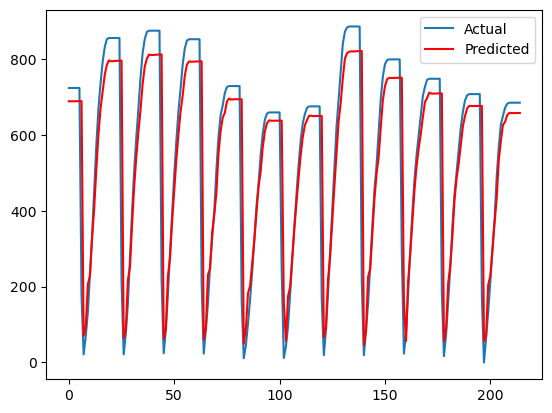

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv("Daily_Yield_Transformed.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)



# Suppose this is your transformed series
series = df['daily_yield']
values = pd.DataFrame(series.values)  # Corrected: Removed redundant ['daily_yield'] indexing
X = series.values
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = list(train)
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1, 0, 2))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Extract prediction
    predictions.append(yhat)
    
    obs = test[t]  # Actual observation
    history.append(obs)  # Update history
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')

# Evaluate forecasts
# Handle potential NaNs in predictions or test
test = np.array(test)  # Ensure test is a NumPy array
predictions = np.array(predictions)  # Ensure predictions is a NumPy array

# Remove rows with NaN values from both test and predictions
mask = ~np.isnan(test) & ~np.isnan(predictions)
test = test[mask]
predictions = predictions[mask]

# Compute RMSE only if valid data exists
if len(test) > 0 and len(predictions) > 0:
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'Test RMSE: {rmse:.3f}')
else:
    print("No valid data available to compute RMSE.")

# Plot forecasts vs actual outcomes
plt.plot(test, label="Actual")
plt.plot(predictions, color='red', label="Predicted")
plt.legend()
plt.show()

## Autocorrelation and Partial Autocorrelation

Type of series: <class 'pandas.core.series.Series'>
Shape of series: (630,)
Date
2020-05-15 06:00:00     18.152230
2020-05-15 07:00:00     67.121806
2020-05-15 08:00:00    137.264646
2020-05-15 09:00:00    212.423222
2020-05-15 10:00:00    302.524010
Name: daily_yield, dtype: float64


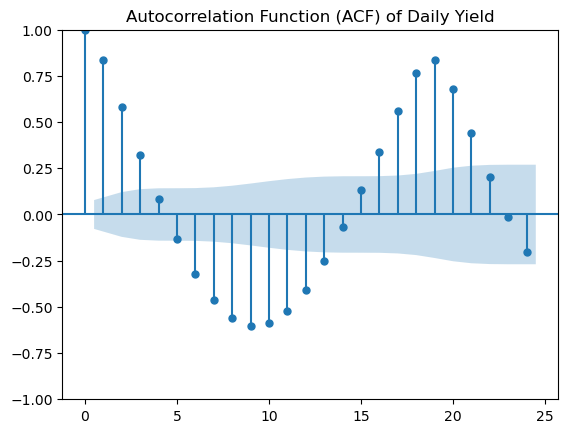

In [124]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

# Load your data
series = pd.read_csv(
    'Daily_Yield_Transformed.csv',
    header=0,
    index_col=0,
    parse_dates=True
)['daily_yield']  # Replace 'daily_yield' with your actual column name

# Ensure series is a 1D array-like object
if isinstance(series, pd.DataFrame):
    series = series.squeeze()  # Convert single-column DataFrame to Series
elif isinstance(series, np.ndarray):
    series = series.flatten()  # Flatten 2D array to 1D

# Debugging: Print type and shape of series
print(f"Type of series: {type(series)}")
print(f"Shape of series: {series.shape}")
print(series.head())

# Plot the ACF
plot_acf(series, lags=24)  # Plot ACF for 12 lags
pyplot.title("Autocorrelation Function (ACF) of Daily Yield")
pyplot.show()

Partial Autocorrelation Function

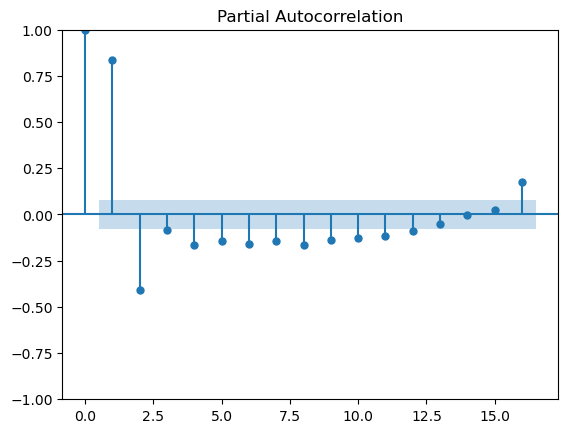

In [126]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=16)
pyplot.show()


ACF and PACF Plots
The ACF plot will show a gradual decay after lag k k.

The PACF plot will show significant spikes up to lag k k and then drop to zero.

Original Dataset:
                  Date  Daily_Yield  daily_yield
0  2020-05-15 06:00:00    40.666667    18.152230
1  2020-05-15 07:00:00   237.714286    67.121806
2  2020-05-15 08:00:00   641.428571   137.264646
3  2020-05-15 09:00:00  1180.375000   212.423222
4  2020-05-15 10:00:00  1936.750000   302.524010
Type of series: <class 'pandas.core.series.Series'>
Shape of series: (630,)
Date
NaT      40.666667
NaT     237.714286
NaT     641.428571
NaT    1180.375000
NaT    1936.750000
Name: Daily_Yield, dtype: float64


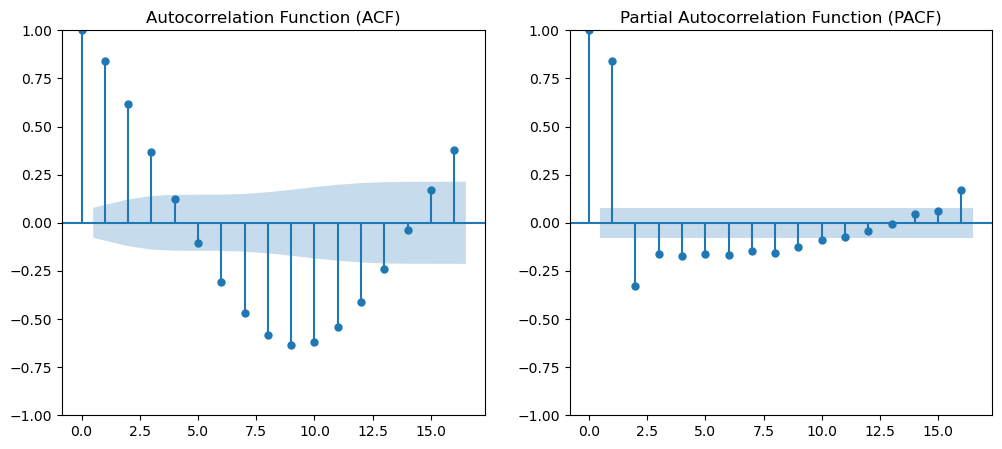

Total observations: 630
Confidence level threshold: 0.0781
Optimal AR(k) order chosen: k = 11


In [128]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import pacf

# Load the dataset
file_path = "Daily_Yield_Transformed.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Clean the temperature column (remove non-numeric characters)
df.iloc[:, -1] = df.iloc[:, -1].replace('[^0-9.-]', '', regex=True)

# Convert the temperature column to numeric (handle errors by coercing to NaN)
df.iloc[:, -1] = pd.to_numeric(df.iloc[:, -1], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Parse the date column
date_column = df.columns[0]
df[date_column] = pd.to_datetime(df[date_column], format="%d-%m-%Y %H:%M", errors='coerce')

# Set the date column as the index
df.set_index(date_column, inplace=True)

# Extract the temperature column as a Series
series = df.iloc[:, 0]  # Explicitly extract the first column as a Series

# Debugging: Print type and shape of series
print(f"Type of series: {type(series)}")
print(f"Shape of series: {series.shape}")
print(series.head())

# **Step 3: Plot ACF and PACF**
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot
sm.graphics.tsa.plot_acf(series, lags=16, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF Plot
sm.graphics.tsa.plot_pacf(series, lags=16, ax=axes[1], method="ywm")
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

# **Step 4: Compute PACF Values**
pacf_values = pacf(series, nlags=16, method='yw')

# **Step 5: Calculate 95% Confidence Threshold**
conf_level = 1.96 / np.sqrt(len(series))  # 95% confidence threshold

# **Step 6: Identify k from PACF (first insignificant lag)**
best_k = np.argmax(np.abs(pacf_values) < conf_level) - 1  # Find where PACF drops

print(f"Total observations: {len(series)}")
print(f"Confidence level threshold: {conf_level:.4f}")
print(f"Optimal AR(k) order chosen: k = {best_k}")

## Gird search :
These are good in most, but perhaps not all, situations. We can automate the process of training and evaluating ARIMA models on different combinations of model hyperparameters. In machine learning this is called a grid search or model tuning.

In [ ]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Evaluate an ARIMA model for a given order (p, d, q)
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[:train_size], X[train_size:]
    history = list(train)
    
    # Make predictions
    predictions = []
    for t in range(len(test)):
        try:
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()  # Fit the ARIMA model
            yhat = model_fit.forecast()[0]  # Forecast the next value
            predictions.append(yhat)
            history.append(test[t])  # Update history with the actual value
        except Exception as e:
            print(f"Erreur avec ARIMA{arima_order}: {e}")
            return float('inf')  # Skip this combination on failure
    
    # Calculate out-of-sample error (RMSE)
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print(f'ARIMA{order} RMSE={rmse:.3f}')
                except Exception as e:
                    print(f"Erreur avec ARIMA{order}: {e}")
                    continue
    print(f'Best ARIMA{best_cfg} RMSE={best_score:.3f}')

# Load dataset
df = read_csv('Daily_Yield_Transformed.csv', parse_dates=["Date"])

# Handle missing timestamps (if any)
df.set_index("Date", inplace=True)
df = df.asfreq('h')  # Lowercase 'h' for hourly frequency

# Forward-fill missing values
df['daily_yield'] = df['daily_yield'].ffill()  # Ensure hourly frequency, inserting missing rows with NaN
  # Forward-fill missing values# Forward-fill missing values

# Extract the 'daily_yield' column for modeling
series = df['daily_yield'].values

# Evaluate parameters (reduced for computational efficiency)
p_values = [0, 1, 2,4,6]
d_values = [0, 1]
q_values = [0, 1]

warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=279.899
ARIMA(0, 0, 1) RMSE=1944.850
ARIMA(0, 1, 0) RMSE=130.848
ARIMA(0, 1, 1) RMSE=130.146
ARIMA(1, 0, 0) RMSE=127.487
ARIMA(1, 0, 1) RMSE=125.992
ARIMA(1, 1, 0) RMSE=130.048
ARIMA(1, 1, 1) RMSE=129.525
ARIMA(2, 0, 0) RMSE=125.501
ARIMA(2, 0, 1) RMSE=115.436
ARIMA(2, 1, 0) RMSE=129.704
ARIMA(2, 1, 1) RMSE=129.509
ARIMA(4, 0, 0) RMSE=122.538
ARIMA(4, 0, 1) RMSE=113.540
ARIMA(4, 1, 0) RMSE=129.565
ARIMA(4, 1, 1) RMSE=1559.840
ARIMA(6, 0, 0) RMSE=119.641
Erreur avec ARIMA(6, 0, 1): LU decomposition error.
ARIMA(6, 0, 1) RMSE=inf


let's finally cach the ARIMA (4,0,1) and see the output plot to compare the actual and the predicted results:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv("Daily_Yield_Transformed.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)



# Suppose this is your transformed series
series = df['daily_yield']
values = pd.DataFrame(series.values)  # Corrected: Removed redundant ['daily_yield'] indexing
X = series.values
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = list(train)
predictions = []

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4,0,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Extract prediction
    predictions.append(yhat)
    
    obs = test[t]  # Actual observation
    history.append(obs)  # Update history
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')

# Evaluate forecasts
# Handle potential NaNs in predictions or test
test = np.array(test)  # Ensure test is a NumPy array
predictions = np.array(predictions)  # Ensure predictions is a NumPy array

# Remove rows with NaN values from both test and predictions
mask = ~np.isnan(test) & ~np.isnan(predictions)
test = test[mask]
predictions = predictions[mask]

# Compute RMSE only if valid data exists
if len(test) > 0 and len(predictions) > 0:
    rmse = sqrt(mean_squared_error(test, predictions))
    print(f'Test RMSE: {rmse:.3f}')
else:
    print("No valid data available to compute RMSE.")

# Plot forecasts vs actual outcomes
plt.plot(test, label="Actual")
plt.plot(predictions, color='red', label="Predicted")
plt.legend()
plt.show()

## Conclusions:
+ analysing the RMSEs found in each model to compare the performance with the Persistence model (RMSE=147.997):
    -   MA as prediction :
      for the most accurate window it gives RMSE=157.848  ==> lower performance than persistence.

    - AR :
       the optimal lag (5) gives an RMSE=138.357 ==> better than the persistence.

    - MA model :
       after using the residuals to correct it , it gives RMSE=136.52 ==> better than the persistence.
 
    - ARIMA :
        after using the gird search and trying different parameters we find the RMSE= 113.54 ==> better than the persistence.
 
      

 

+ The ARIMA model gives the best performance because it effectively captures the underlying patterns in the stationary time series, as confirmed by the ACF/PACF analysis and validated through accurate forecasts with minimal residual errors.

  


+ After the path we followed in the further analysis, we can recap by highliting:

One of the most valuable insights came from applying time series decomposition, which clearly showed a daily seasonal pattern—high power generation during the day and almost none at night—as expected. The trend component helped highlight the overall stability and growth in production, and residuals indicated occasional irregularities that could be linked to weather conditions or technical factors not included in the dataset.

From a technical perspective, I encountered several real-world data challenges:

Many NaN values persisted despite my efforts to clean the data, especially after grouping or filtering by SOURCE_KEY ,I faced multiple coding errors,Additionally, I had to deal with timestamp format issues and warnings about ambiguous parsing, which taught me to pay close attention to time-related data and to always validate the structure post-conversion.

Overall, this project was both challenging and rewarding. It allowed me to: Develop a solid understanding of seasonal time series modeling,gain hands-on experience in data cleaning, transformation,resampling and forecasting techniques and learn how to debug real errors that commonly occur when working with imperfect datasets.
